### This notebook is for preforming EDA on the CoD dataset

Lets first build out the data from out batched Perspective queries

In [1]:
import pickle
import json
import pandas as pd
import matplotlib.pyplot as plt 
from keras.preprocessing.text import Tokenizer
import seaborn as sns
import spacy
import os
import pandas as pd
import numpy as np
import spacy
import unidecode
import contractions as contract
import re
import wordninja
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import collections
import pkg_resources
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from collections import Counter
from nltk.probability import FreqDist

In [2]:
%%script false --no-raise-error
data = []
up_to_batch = 14
for item in range(9000,int((up_to_batch + 1) * 9000),9000):
    filepath="./cod_toxic_scores/all_data_posTox_quota_increase/batch_" + str(int(item/9000)) + "_remainder_" + str(int(item%9000)) + ".pkl"
    with open(filepath, 'rb') as f:
        tmp_load = pickle.load(f)
    for item in tmp_load:
        data.append(item)

Couldn't find program: 'false'


In [3]:
%%script false --no-raise-error
# From JF's data_cleaning.ipynb
# Remove some important words from stopwords list 
# python -m spacy download en_core_web_sm
deselecTox_stop_words = ['no', 'not']
nlp = spacy.load("en_core_web_sm") 
for w in deselecTox_stop_words:
    nlp.vocab[w].is_stop = False

Couldn't find program: 'false'


In [4]:
%%script false --no-raise-error
# From JF's data_cleaning.ipynb
def text_preprocessing(text,stop_words=True,convert_num=True,lemmatization=True):
    doc = nlp(text) # tokenise text
    clean_text = []
    # return text
    for token in doc:
        flag = True
        edit = token.text
        # remove stop words
        if stop_words == True and token.is_stop and token.pos_ != 'NUM': 
            flag = False
        # exclude number words
        if converTox_num == True and token.pos_ == 'NUM' and flag == True:
            flag = False
        # convert tokens to base form
        elif lemmatization == True and token.lemma_ != "-PRON-" and flag == True:
            edit = token.lemma_
        # append tokens edited and not removed to list 
        if edit != "" and flag == True:
            clean_text.append(edit)        
    return " ".join(clean_text)

Couldn't find program: 'false'


In [5]:
%%script false --no-raise-error
df = pd.DataFrame(data)
cols = ['Time','User_Id','Text','Attachment','Reply_chain','Reactions','gif','Edited_Time','TOXICITY_Probability']
df.set_axis(cols, axis=1,inplace=True)
df.head()

Couldn't find program: 'false'


In [6]:
%%script false --no-raise-error
df["Text"] = df["Text"].apply(text_preprocessing)
df.head()

Couldn't find program: 'false'


In [7]:
%%script false --no-raise-error
df["Text"] = df["Text"].str.replace(r'\b\w{1,1}\b', '', regex=True)
df["Text"] = df["Text"].str.replace('  ', ' ', regex=True)
df["Text"] = df["Text"].str.strip()
df.head()

Couldn't find program: 'false'


### Lets build some buckets of TOXIC_Probability scores

In [8]:
# pkl
#df.to_pickle("./clean_stopwords_removed_toxic_rated_cod_text.pkl") 
df = pd.read_pickle("./clean_stopwords_removed_toxic_rated_cod_text.pkl")
df.head() 

Time  User_Id               Text Attachment          Reply_chain  \
0  1661962692851     1108              supra        NaN                  NaN   
1  1661962696380      622                 hb        NaN                  NaN   
2  1661962696556      113       ana de armas        NaN  1014569529956909139   
3  1661962700953        3          nice like        NaN  1014569710844653588   
4  1661962713995        8  friday work today        NaN  1014569740078956666   

              Reactions  gif  Edited_Time  TOXICITY_Probability  
0  [{'c': 1, 'n': '🤓'}]  NaN          NaN              0.043375  
1                   NaN  NaN          NaN              0.029984  
2                   NaN  NaN          NaN              0.108281  
3                   NaN  NaN          NaN              0.075312  
4                   NaN  NaN          NaN              0.017007

## We now have our TOXIC classification dataset.  Time for EDA

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [9]:
Tox_0_1_df = df[df['TOXICITY_Probability'].between(0, 0.1, inclusive='left')]
print(len(Tox_0_1_df))
Tox_1_2_df = df[df['TOXICITY_Probability'].between(0.1, 0.2, inclusive='left')]
print(len(Tox_1_2_df))
Tox_2_3_df = df[df['TOXICITY_Probability'].between(0.2, 0.3, inclusive='left')]
print(len(Tox_2_3_df))
Tox_3_4_df = df[df['TOXICITY_Probability'].between(0.3, 0.4, inclusive='left')]
print(len(Tox_3_4_df))
Tox_4_5_df = df[df['TOXICITY_Probability'].between(0.4, 0.5, inclusive='left')]
print(len(Tox_4_5_df))
Tox_5_6_df = df[df['TOXICITY_Probability'].between(0.5, 0.6, inclusive='left')]
print(len(Tox_5_6_df))
Tox_6_7_df = df[df['TOXICITY_Probability'].between(0.6, 0.7, inclusive='left')]
print(len(Tox_6_7_df))
Tox_7_8_df = df[df['TOXICITY_Probability'].between(0.7, 0.8, inclusive='left')]
print(len(Tox_7_8_df))
Tox_8_9_df = df[df['TOXICITY_Probability'].between(0.8, 0.9, inclusive='left')]
print(len(Tox_8_9_df))
Tox_9_10_df = df[df['TOXICITY_Probability'].between(0.9, 1, inclusive='both')]
print(len(Tox_9_10_df))

72373
21114
9249
5585
3057
2519
1179
1823
3020
1554


In [10]:
# From JF's data_cleaning.ipynb
# Tokenize all histogram classes
tokenizer_Tox_0_1_df = Tokenizer()
tokenizer_Tox_0_1_df.fit_on_texts(Tox_0_1_df['Text'])

tokenizer_Tox_1_2_df = Tokenizer()
tokenizer_Tox_1_2_df.fit_on_texts(Tox_1_2_df['Text'])

tokenizer_Tox_2_3_df = Tokenizer()
tokenizer_Tox_2_3_df.fit_on_texts(Tox_2_3_df['Text'])

tokenizer_Tox_3_4_df = Tokenizer()
tokenizer_Tox_3_4_df.fit_on_texts(Tox_3_4_df['Text'])

tokenizer_Tox_4_5_df = Tokenizer()
tokenizer_Tox_4_5_df.fit_on_texts(Tox_4_5_df['Text'])

tokenizer_Tox_5_6_df = Tokenizer()
tokenizer_Tox_5_6_df.fit_on_texts(Tox_5_6_df['Text'])

tokenizer_Tox_6_7_df = Tokenizer()
tokenizer_Tox_6_7_df.fit_on_texts(Tox_6_7_df['Text'])

tokenizer_Tox_7_8_df = Tokenizer()
tokenizer_Tox_7_8_df.fit_on_texts(Tox_7_8_df['Text'])

tokenizer_Tox_8_9_df = Tokenizer()
tokenizer_Tox_8_9_df.fit_on_texts(Tox_8_9_df['Text'])

tokenizer_Tox_9_10_df = Tokenizer()
tokenizer_Tox_9_10_df.fit_on_texts(Tox_9_10_df['Text'])

In [11]:
# Obtain word frequency 
word_freq_tokenizer_Tox_0_1_df = pd.DataFrame(tokenizer_Tox_0_1_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_1_2_df = pd.DataFrame(tokenizer_Tox_1_2_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_2_3_df = pd.DataFrame(tokenizer_Tox_2_3_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_3_4_df = pd.DataFrame(tokenizer_Tox_3_4_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_4_5_df = pd.DataFrame(tokenizer_Tox_4_5_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_5_6_df = pd.DataFrame(tokenizer_Tox_5_6_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_6_7_df = pd.DataFrame(tokenizer_Tox_6_7_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_7_8_df = pd.DataFrame(tokenizer_Tox_7_8_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_8_9_df = pd.DataFrame(tokenizer_Tox_8_9_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_9_10_df = pd.DataFrame(tokenizer_Tox_9_10_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)

## Frequent Words and Message Length

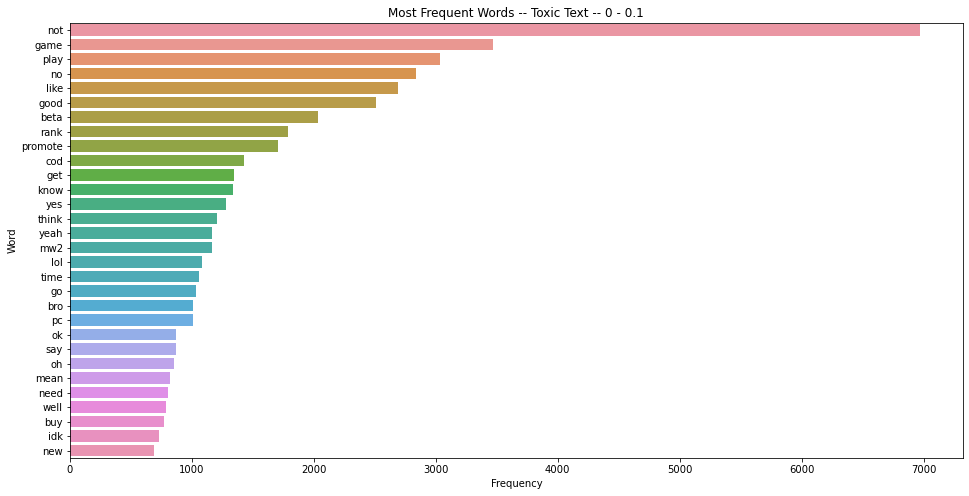

Word counts


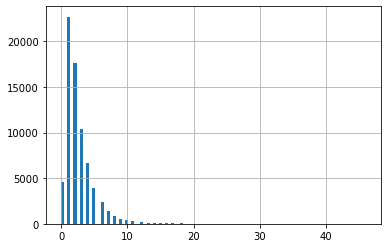

count    72373.000000
mean         2.609274
std          2.398066
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         46.000000
dtype: float64


In [12]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_0_1_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0 - 0.1')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_0_1_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

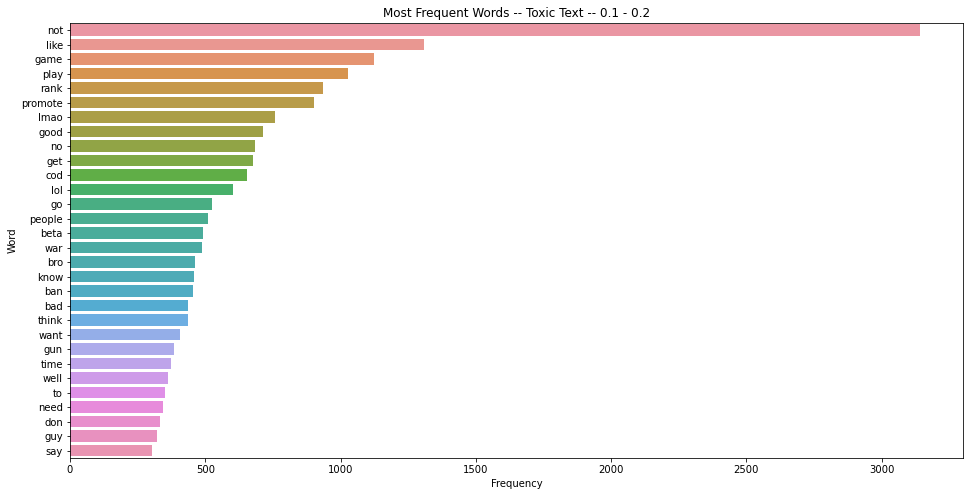

Word counts


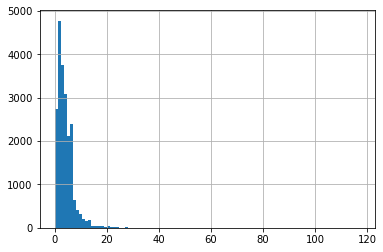

count    21114.000000
mean         4.135124
std          3.590337
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        117.000000
dtype: float64


In [13]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_1_2_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.1 - 0.2')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_1_2_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

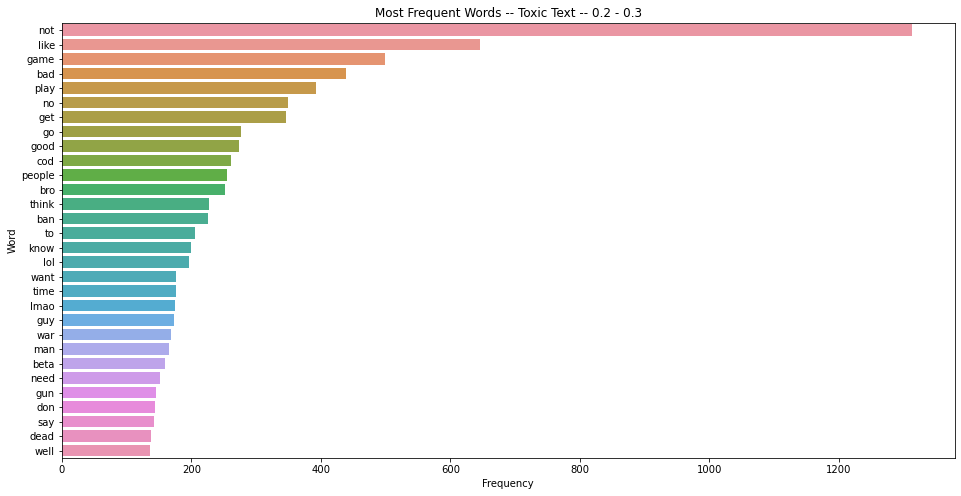

Word counts


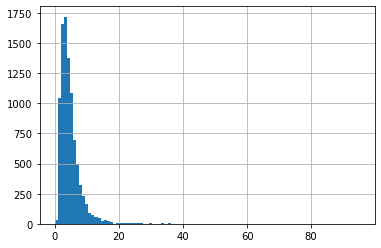

count    9249.000000
mean        4.481566
std         3.981699
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        95.000000
dtype: float64


In [14]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_2_3_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.2 - 0.3')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_2_3_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

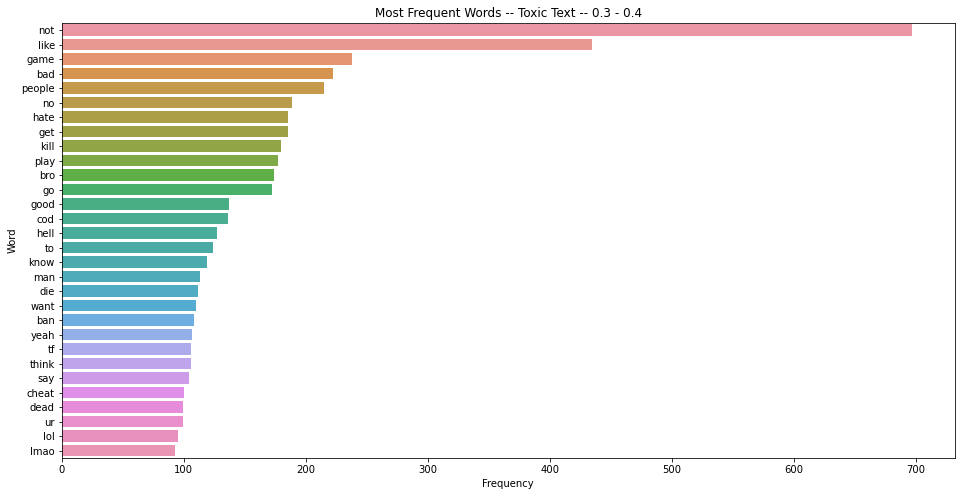

Word counts


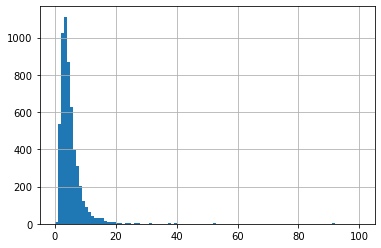

count    5585.000000
mean        4.579767
std         4.401149
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       100.000000
dtype: float64


In [15]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_3_4_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.3 - 0.4')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_3_4_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

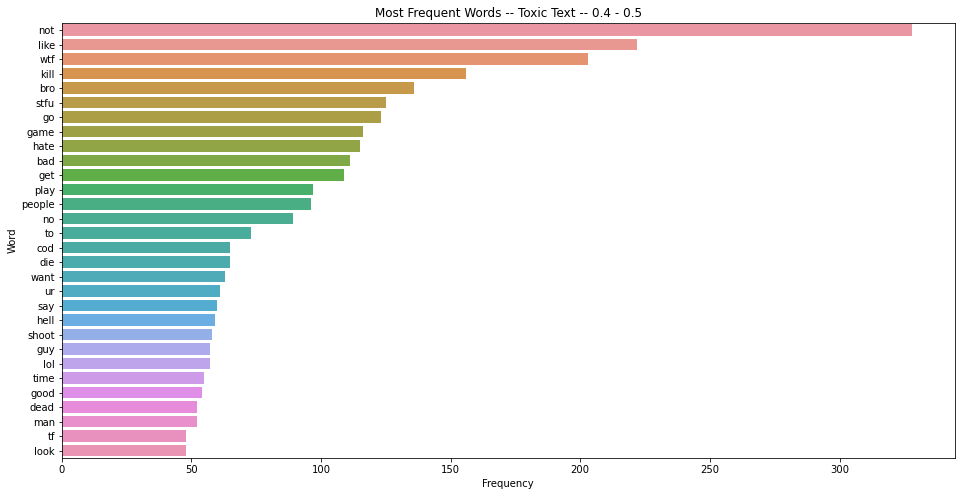

Word counts


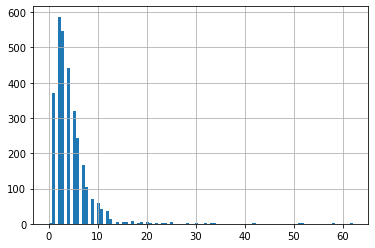

count    3057.000000
mean        4.455021
std         3.944065
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        62.000000
dtype: float64


In [16]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_4_5_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.4 - 0.5')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_4_5_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

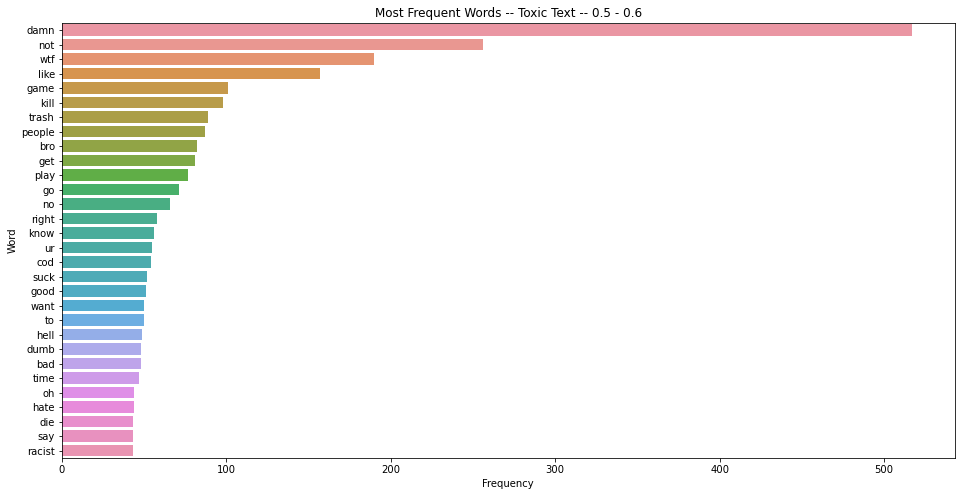

Word counts


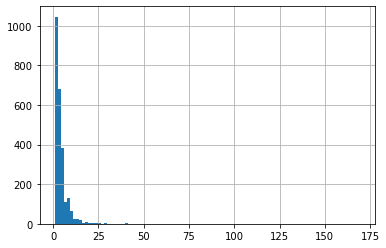

count    2519.000000
mean        4.108773
std         5.076155
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       169.000000
dtype: float64


In [17]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_5_6_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.5 - 0.6')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_5_6_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

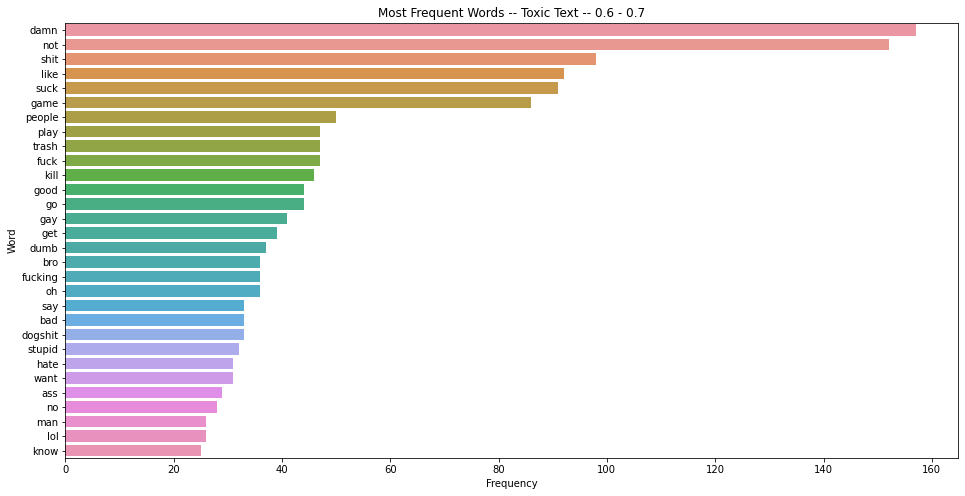

Word counts


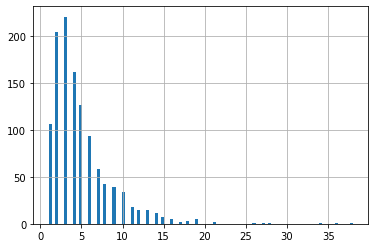

count    1179.000000
mean        4.914334
std         3.903804
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        38.000000
dtype: float64


In [18]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_6_7_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.6 - 0.7')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_6_7_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

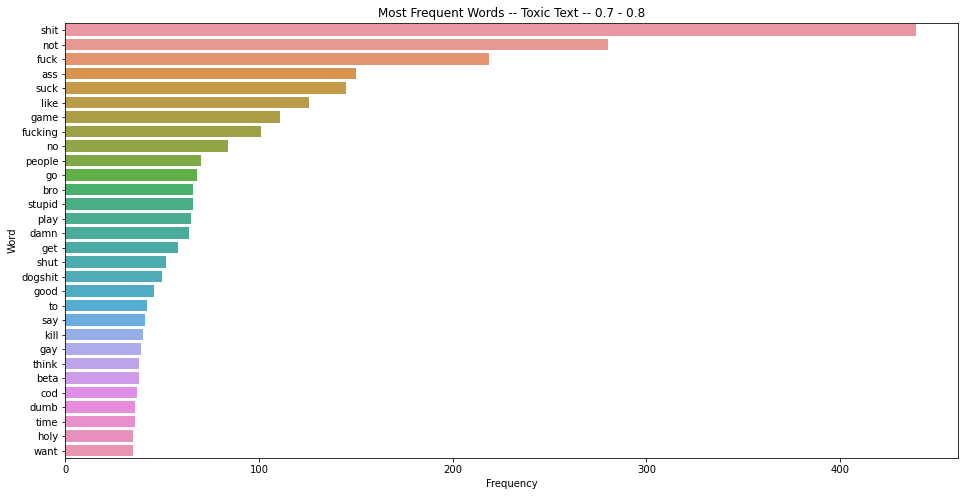

Word counts


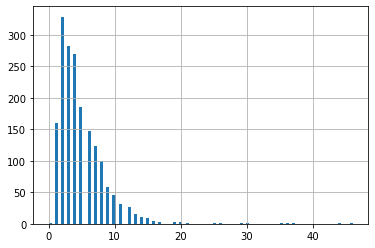

count    1823.000000
mean        4.957762
std         3.938311
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        46.000000
dtype: float64


In [19]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_7_8_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.7 - 0.8')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_7_8_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

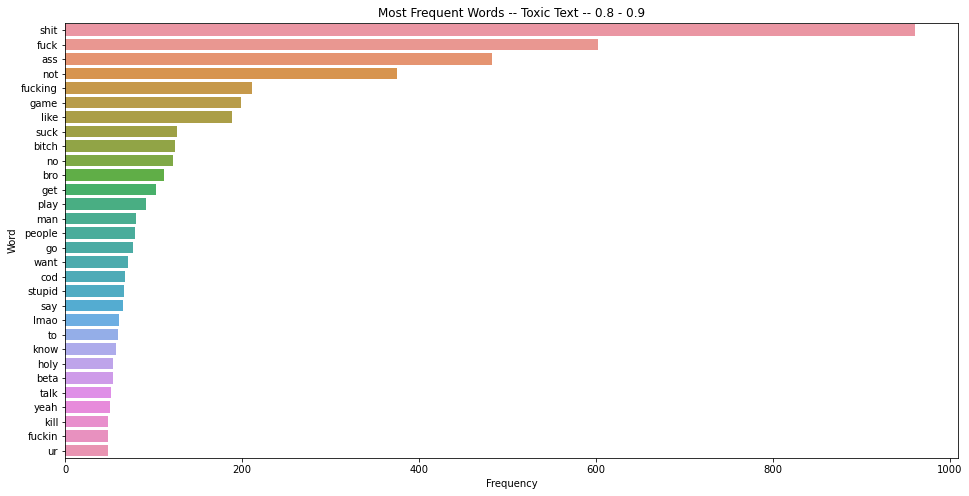

Word counts


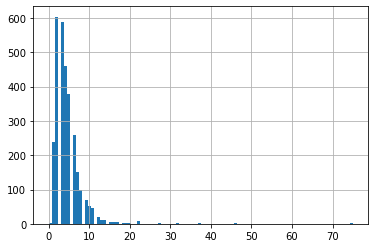

count    3020.000000
mean        4.394040
std         3.351699
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        75.000000
dtype: float64


In [20]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_8_9_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.8 - 0.9')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_8_9_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

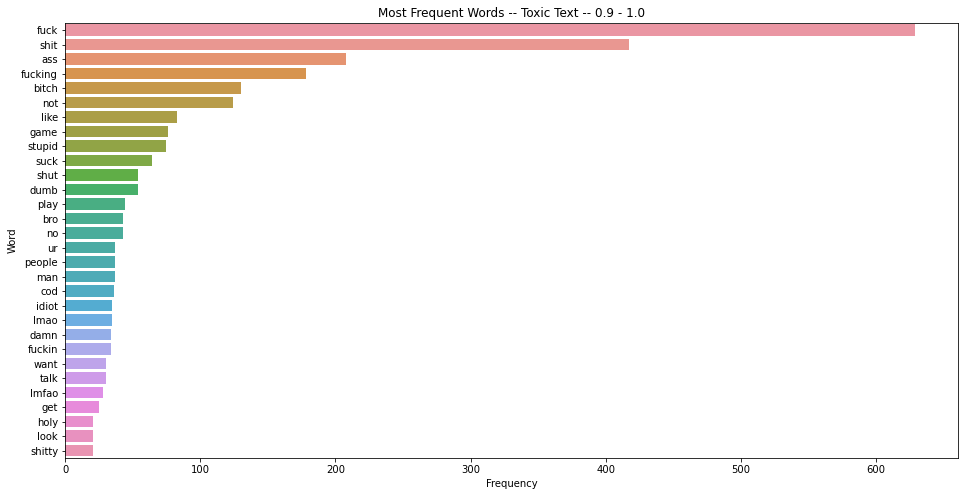

Word counts


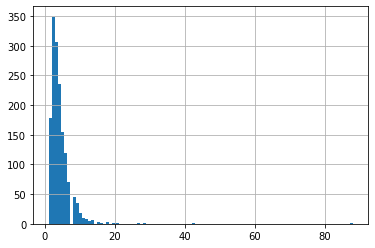

count    1554.000000
mean        4.091377
std         4.186956
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        88.000000
dtype: float64


In [21]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_9_10_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.9 - 1.0')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_9_10_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

## Wordclouds

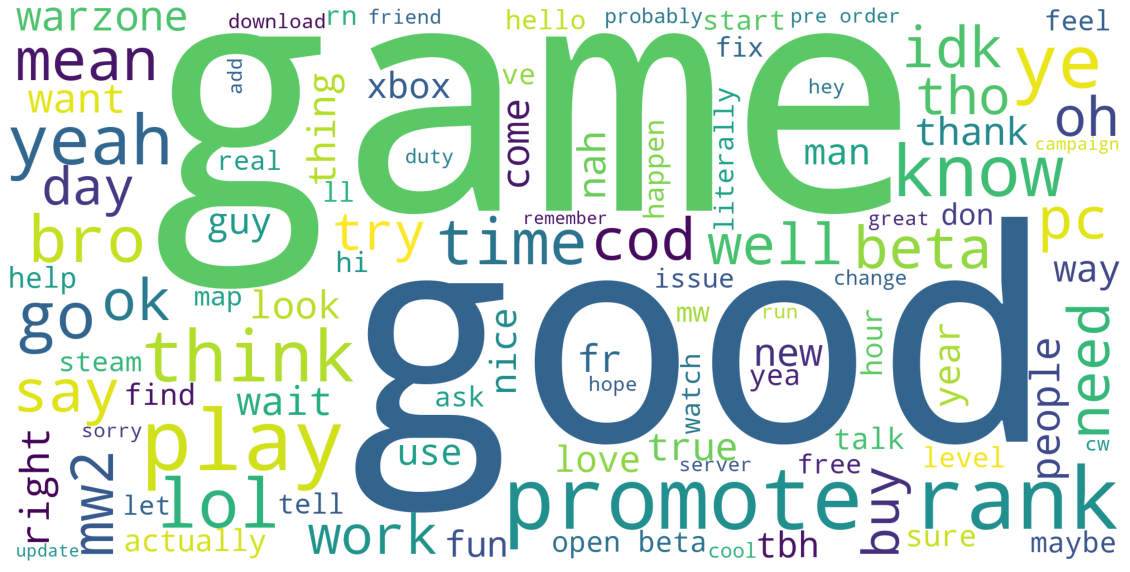

In [22]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_0_1_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

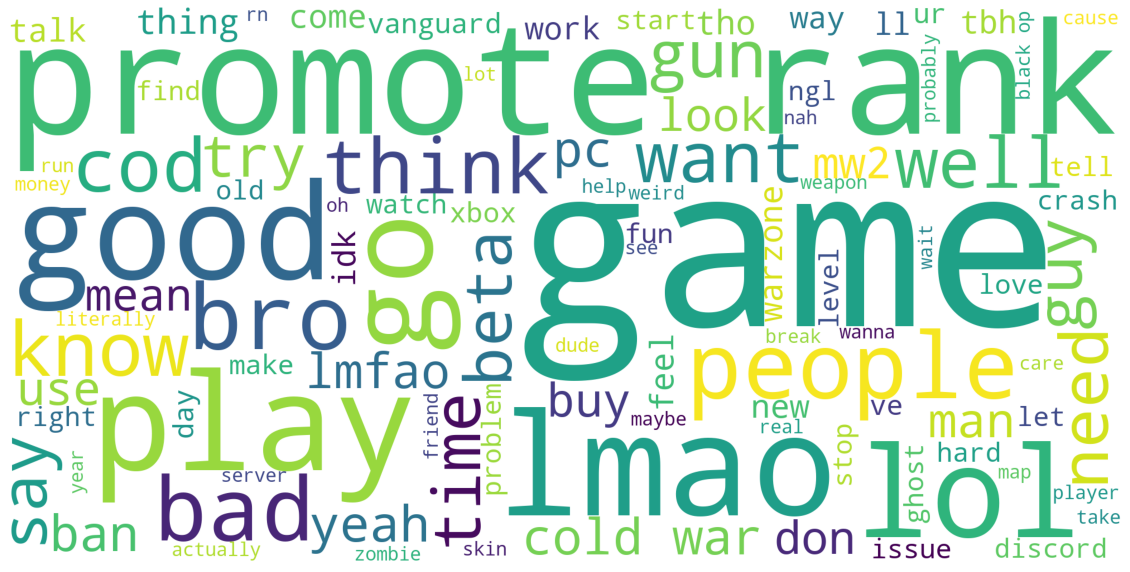

In [23]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_1_2_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

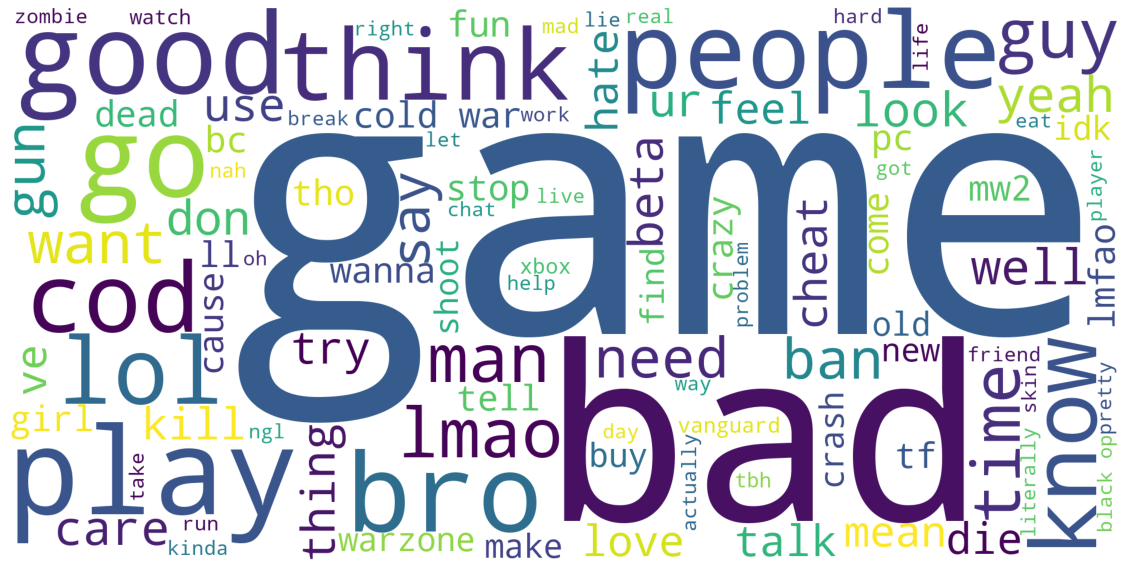

In [24]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_2_3_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

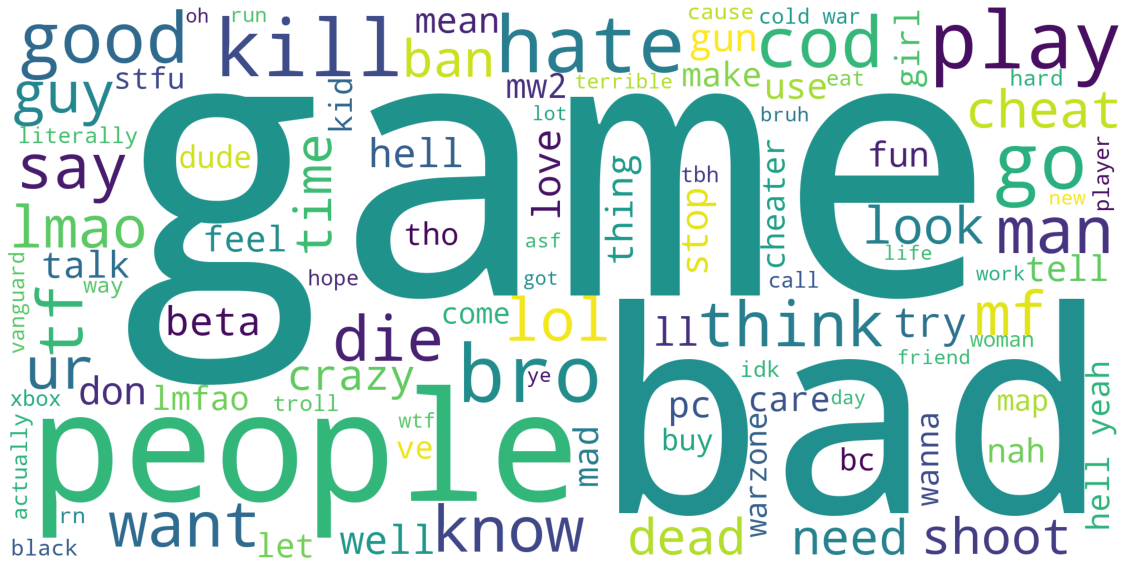

In [25]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_3_4_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

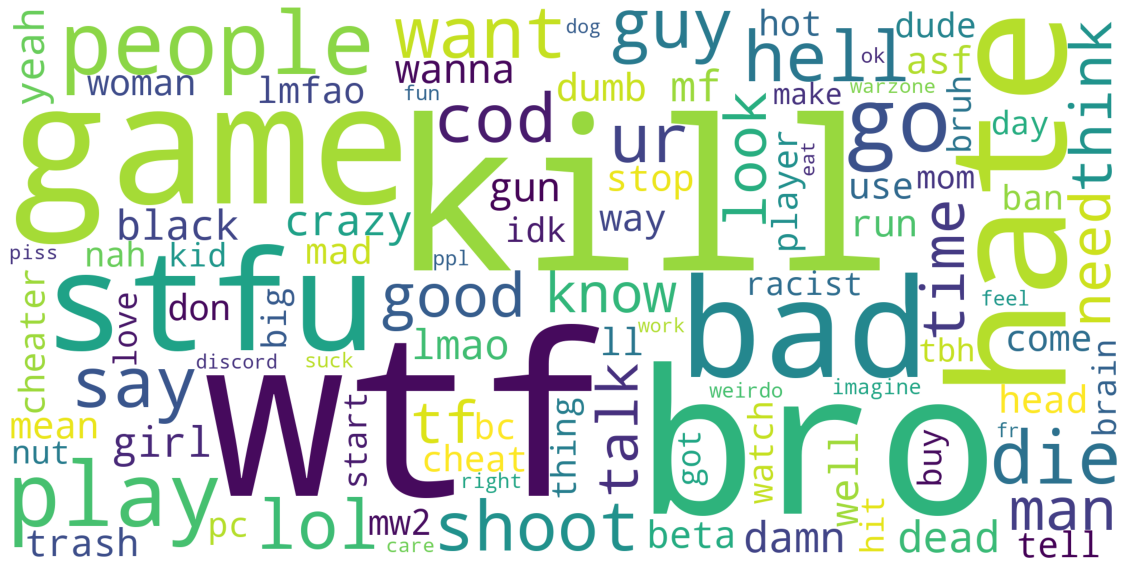

In [26]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_4_5_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

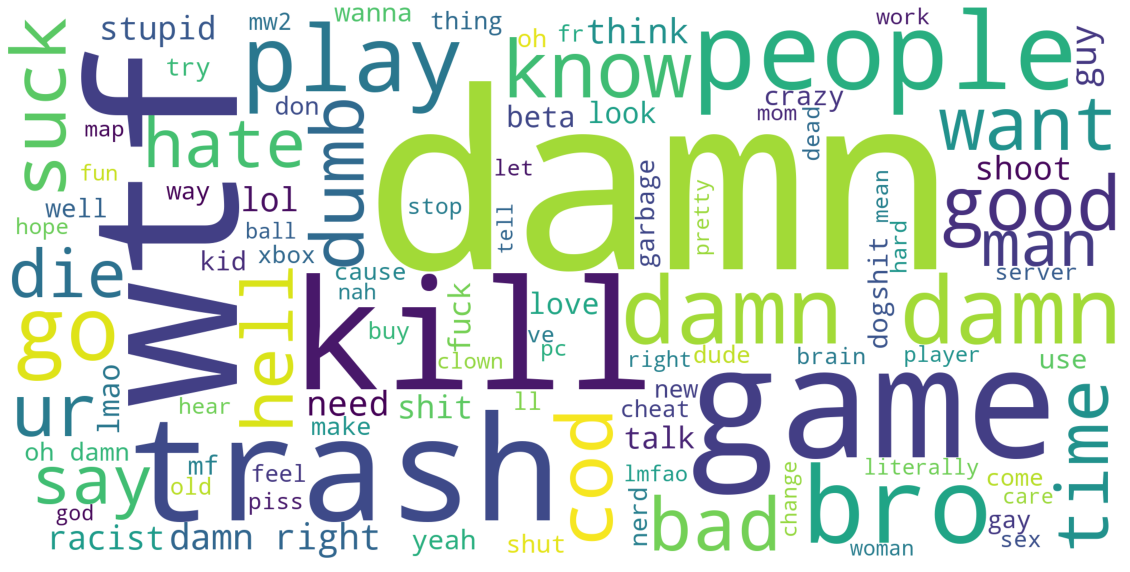

In [27]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_5_6_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

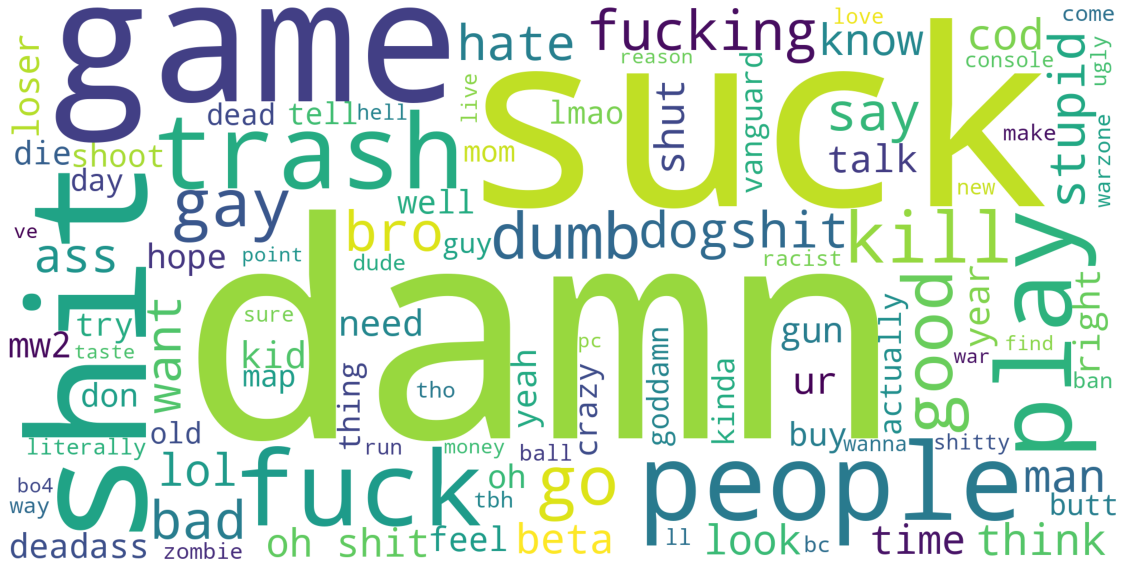

In [28]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_6_7_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

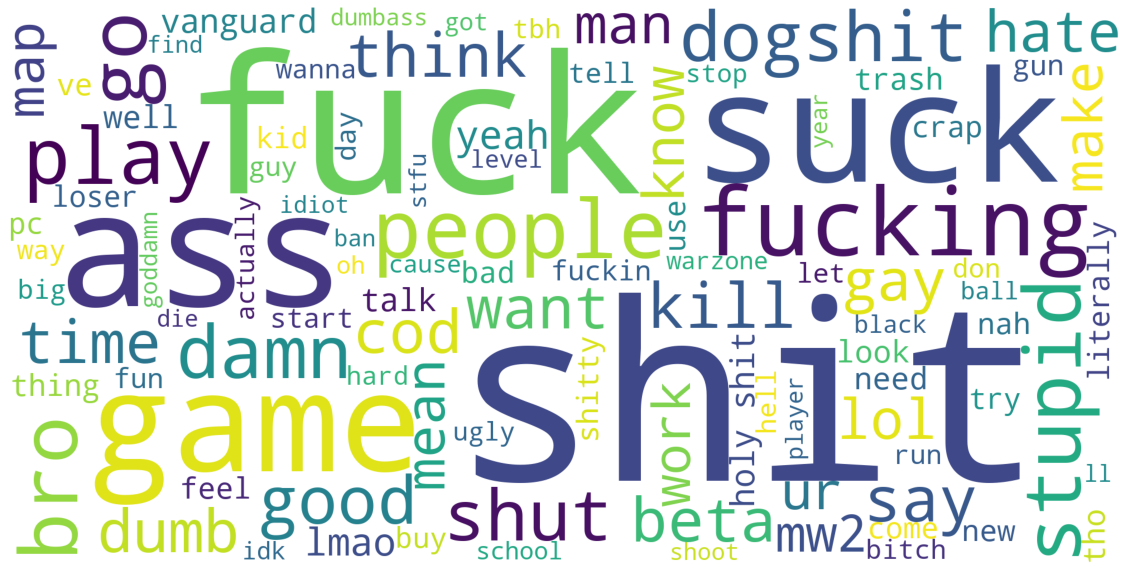

In [29]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_7_8_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

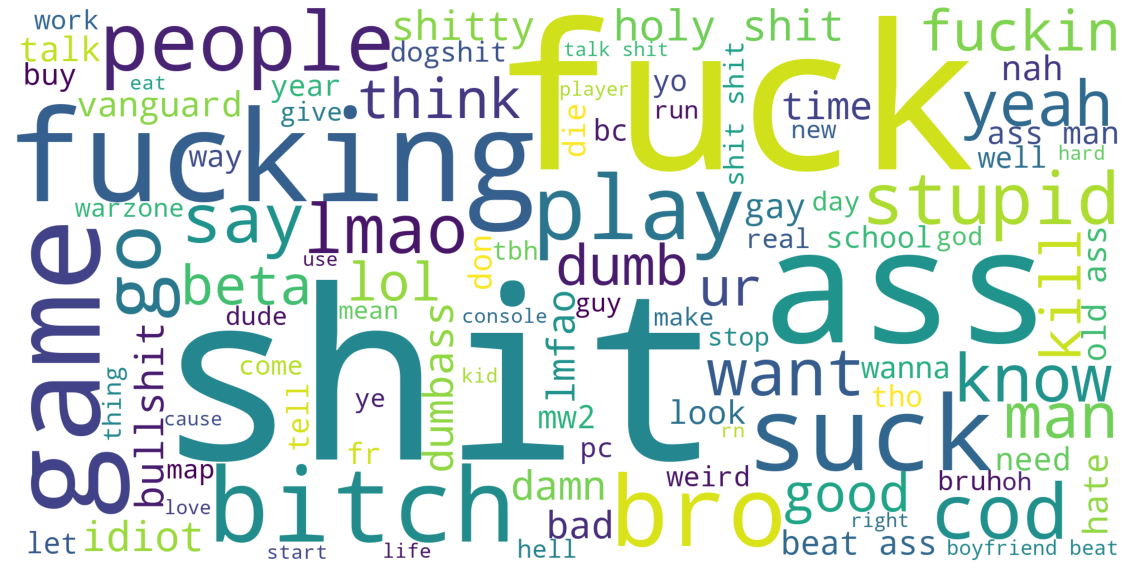

In [30]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_8_9_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

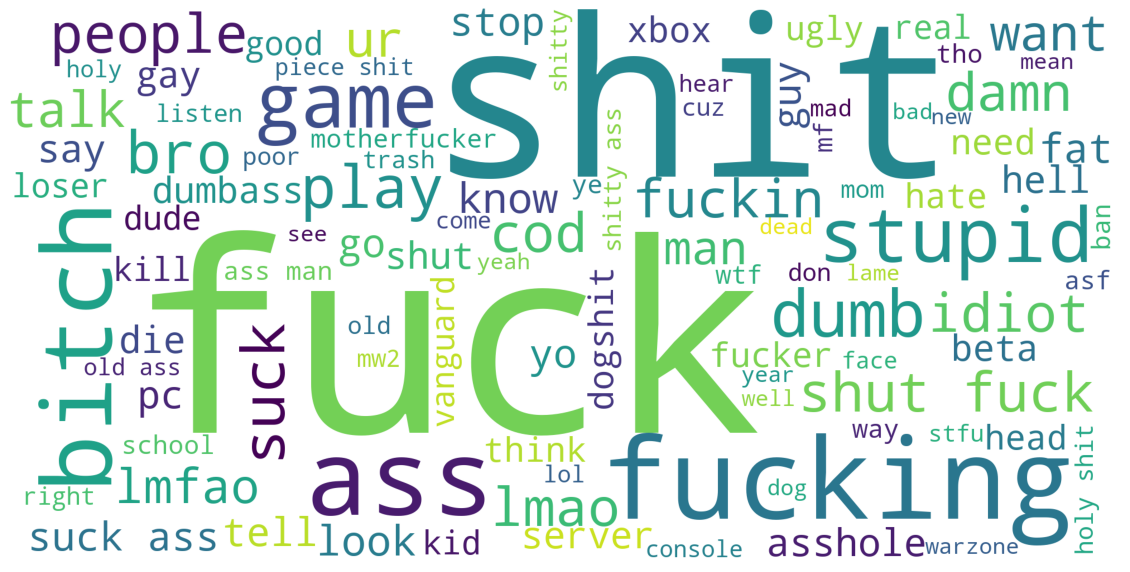

In [31]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_9_10_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

## Polarity and Subjectivity Scores

In [32]:
# Polarity score distribution for toxic chats
def get_polarity(text):
  return TextBlob(text).sentiment.polarity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\347765150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_0_1_df['Polarity'] = Tox_0_1_df['Text'].apply(get_polarity)


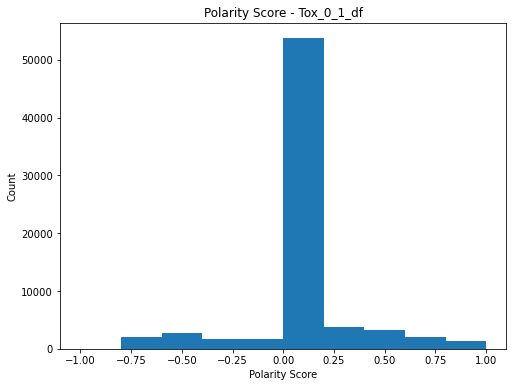

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\347765150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_0_1_df['Subjectivity'] = Tox_0_1_df['Text'].apply(get_subjectivity)


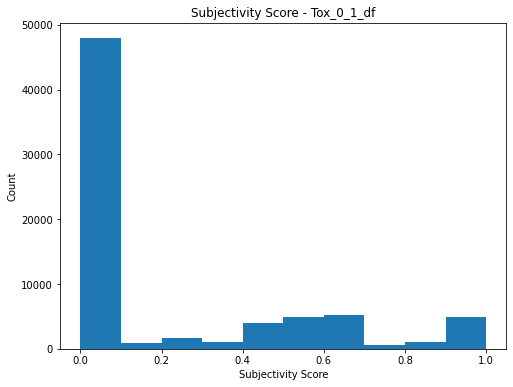

In [33]:
Tox_0_1_df['Polarity'] = Tox_0_1_df['Text'].apply(get_polarity)
ax = Tox_0_1_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_0_1_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_0_1_df['Subjectivity'] = Tox_0_1_df['Text'].apply(get_subjectivity)
ax = Tox_0_1_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_0_1_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2533403364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_1_2_df['Polarity'] = Tox_1_2_df['Text'].apply(get_polarity)


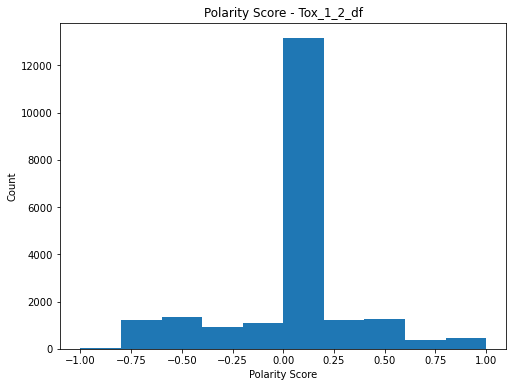

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2533403364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_1_2_df['Subjectivity'] = Tox_1_2_df['Text'].apply(get_subjectivity)


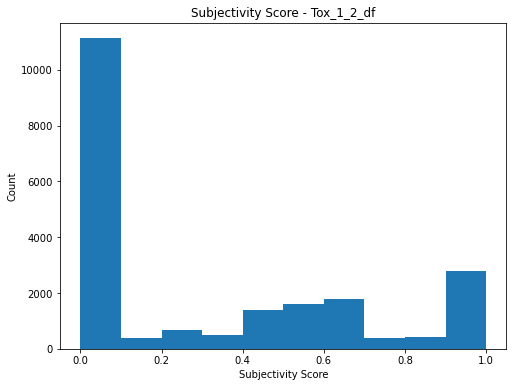

In [34]:
Tox_1_2_df['Polarity'] = Tox_1_2_df['Text'].apply(get_polarity)
ax = Tox_1_2_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_1_2_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_1_2_df['Subjectivity'] = Tox_1_2_df['Text'].apply(get_subjectivity)
ax = Tox_1_2_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_1_2_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3958380426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_2_3_df['Polarity'] = Tox_2_3_df['Text'].apply(get_polarity)


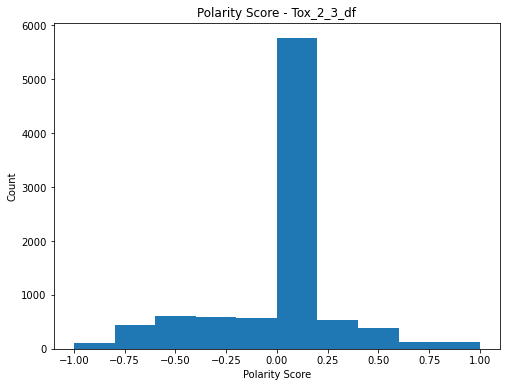

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3958380426.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_2_3_df['Subjectivity'] = Tox_2_3_df['Text'].apply(get_subjectivity)


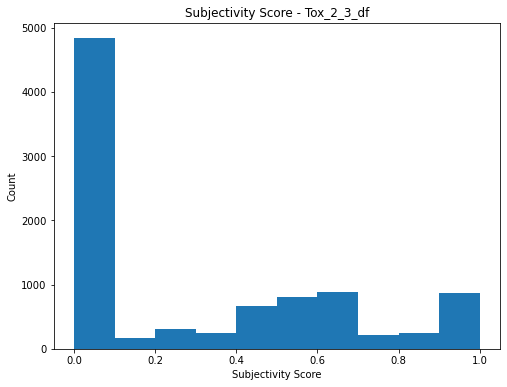

In [35]:
Tox_2_3_df['Polarity'] = Tox_2_3_df['Text'].apply(get_polarity)
ax = Tox_2_3_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_2_3_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_2_3_df['Subjectivity'] = Tox_2_3_df['Text'].apply(get_subjectivity)
ax = Tox_2_3_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_2_3_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3565077084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_3_4_df['Polarity'] = Tox_3_4_df['Text'].apply(get_polarity)


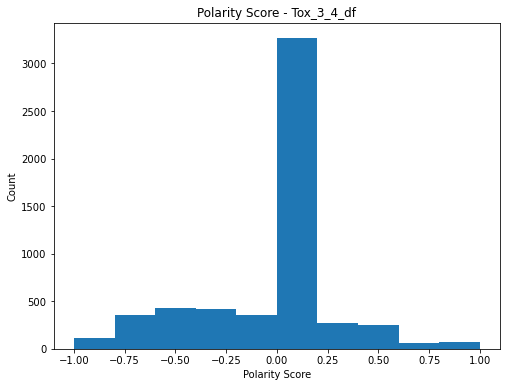

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3565077084.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_3_4_df['Subjectivity'] = Tox_3_4_df['Text'].apply(get_subjectivity)


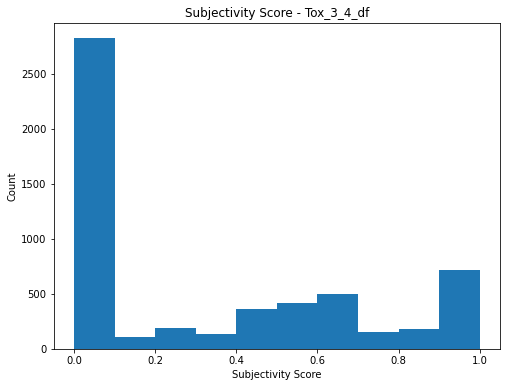

In [36]:
Tox_3_4_df['Polarity'] = Tox_3_4_df['Text'].apply(get_polarity)
ax = Tox_3_4_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_3_4_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_3_4_df['Subjectivity'] = Tox_3_4_df['Text'].apply(get_subjectivity)
ax = Tox_3_4_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_3_4_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2027037582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_4_5_df['Polarity'] = Tox_4_5_df['Text'].apply(get_polarity)


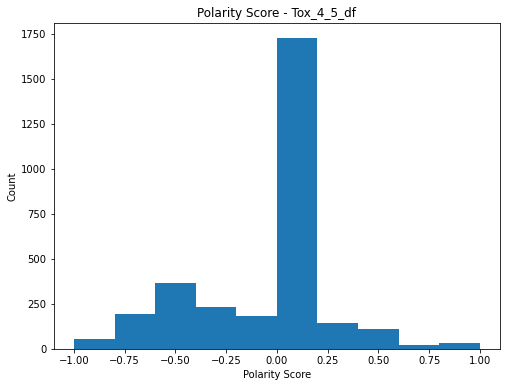

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2027037582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_4_5_df['Subjectivity'] = Tox_4_5_df['Text'].apply(get_subjectivity)


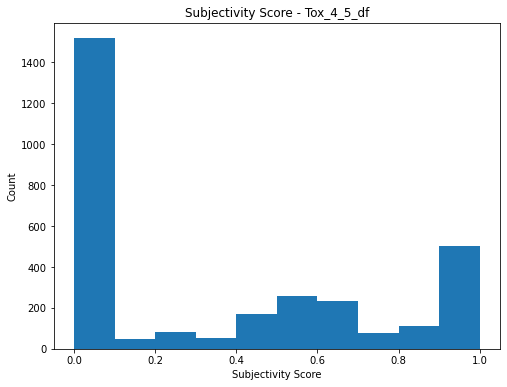

In [37]:
Tox_4_5_df['Polarity'] = Tox_4_5_df['Text'].apply(get_polarity)
ax = Tox_4_5_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_4_5_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_4_5_df['Subjectivity'] = Tox_4_5_df['Text'].apply(get_subjectivity)
ax = Tox_4_5_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_4_5_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2570625483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_5_6_df['Polarity'] = Tox_5_6_df['Text'].apply(get_polarity)


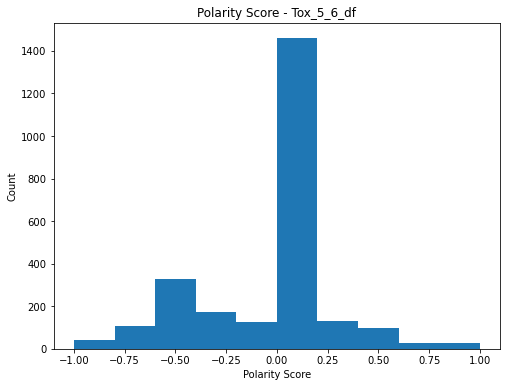

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2570625483.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_5_6_df['Subjectivity'] = Tox_5_6_df['Text'].apply(get_subjectivity)


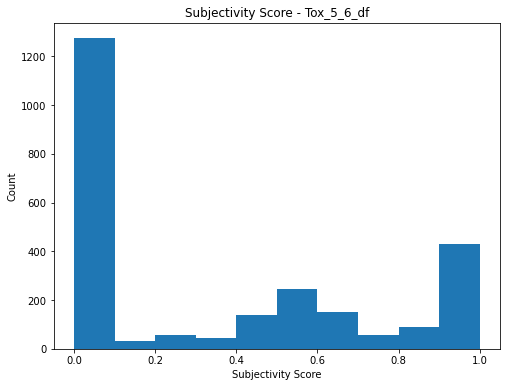

In [38]:
Tox_5_6_df['Polarity'] = Tox_5_6_df['Text'].apply(get_polarity)
ax = Tox_5_6_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_5_6_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_5_6_df['Subjectivity'] = Tox_5_6_df['Text'].apply(get_subjectivity)
ax = Tox_5_6_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_5_6_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\1641774200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_6_7_df['Polarity'] = Tox_6_7_df['Text'].apply(get_polarity)


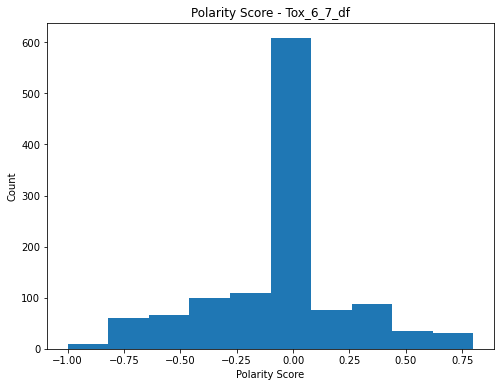

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\1641774200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_6_7_df['Subjectivity'] = Tox_6_7_df['Text'].apply(get_subjectivity)


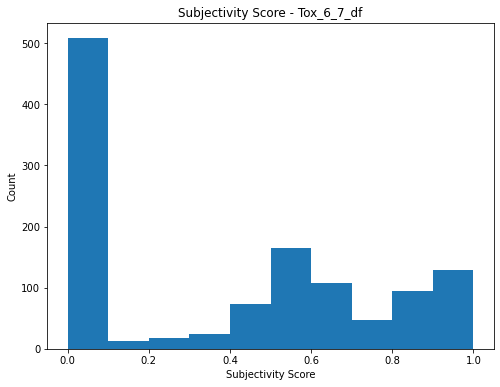

In [39]:
Tox_6_7_df['Polarity'] = Tox_6_7_df['Text'].apply(get_polarity)
ax = Tox_6_7_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_6_7_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_6_7_df['Subjectivity'] = Tox_6_7_df['Text'].apply(get_subjectivity)
ax = Tox_6_7_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_6_7_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2836110747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_7_8_df['Polarity'] = Tox_7_8_df['Text'].apply(get_polarity)


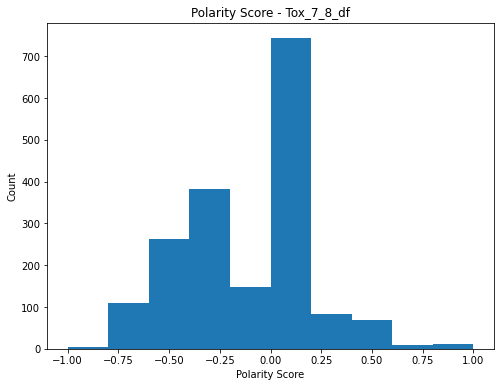

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2836110747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_7_8_df['Subjectivity'] = Tox_7_8_df['Text'].apply(get_subjectivity)


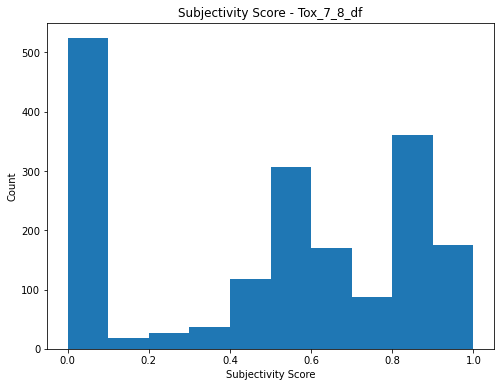

In [40]:
Tox_7_8_df['Polarity'] = Tox_7_8_df['Text'].apply(get_polarity)
ax = Tox_7_8_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_7_8_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_7_8_df['Subjectivity'] = Tox_7_8_df['Text'].apply(get_subjectivity)
ax = Tox_7_8_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_7_8_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3453314204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_8_9_df['Polarity'] = Tox_8_9_df['Text'].apply(get_polarity)


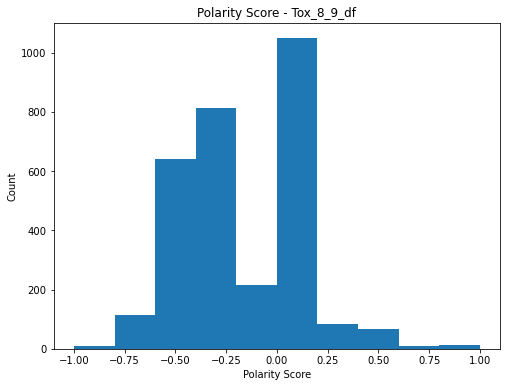

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3453314204.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_8_9_df['Subjectivity'] = Tox_8_9_df['Text'].apply(get_subjectivity)


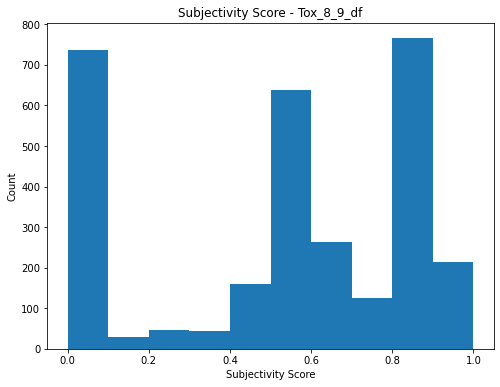

In [41]:
Tox_8_9_df['Polarity'] = Tox_8_9_df['Text'].apply(get_polarity)
ax = Tox_8_9_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_8_9_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_8_9_df['Subjectivity'] = Tox_8_9_df['Text'].apply(get_subjectivity)
ax = Tox_8_9_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_8_9_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\1753852692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_9_10_df['Polarity'] = Tox_9_10_df['Text'].apply(get_polarity)


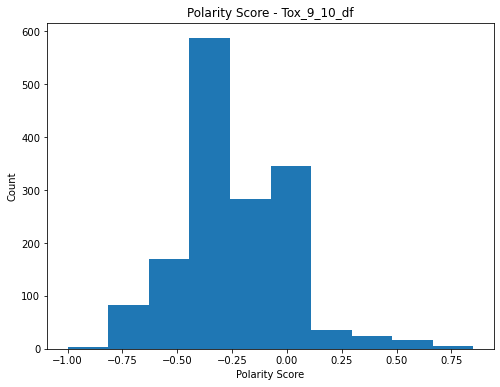

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\1753852692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_9_10_df['Subjectivity'] = Tox_9_10_df['Text'].apply(get_subjectivity)


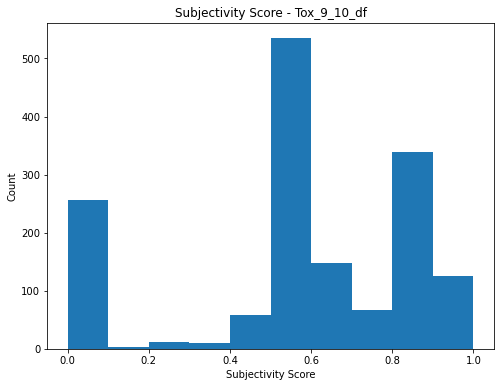

In [42]:
Tox_9_10_df['Polarity'] = Tox_9_10_df['Text'].apply(get_polarity)
ax = Tox_9_10_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_9_10_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_9_10_df['Subjectivity'] = Tox_9_10_df['Text'].apply(get_subjectivity)
ax = Tox_9_10_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_9_10_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

In [43]:
Tox_0_1_df['bucket'] = 0
Tox_1_2_df['bucket'] = 1
Tox_2_3_df['bucket'] = 2
Tox_3_4_df['bucket'] = 3
Tox_4_5_df['bucket'] = 4
Tox_5_6_df['bucket'] = 5
Tox_6_7_df['bucket'] = 6
Tox_7_8_df['bucket'] = 7
Tox_8_9_df['bucket'] = 8
Tox_9_10_df['bucket'] = 9
# Keeping Tox_0_1_df out because it skews the chart
bucketed_df = pd.concat([Tox_1_2_df,Tox_2_3_df,Tox_3_4_df,Tox_4_5_df,Tox_5_6_df,Tox_6_7_df,Tox_7_8_df,Tox_8_9_df,Tox_9_10_df])
bucketed_df.head()

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3296584369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_0_1_df['bucket'] = 0
C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3296584369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_1_2_df['bucket'] = 1
C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3296584369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Time  User_Id                                Text Attachment  \
2   1661962696556      113                        ana de armas        NaN   
8   1661962720812      113  black aventador ana de armas decal        NaN   
16  1661962745070      113            not think care car linda        NaN   
18  1661962746070     1135             wanna help good loadout        NaN   
33  1661962797854       35                      want dream car        NaN   

            Reply_chain Reactions  gif  Edited_Time  TOXICITY_Probability  \
2   1014569529956909139       NaN  NaN          NaN              0.108281   
8                   NaN       NaN  NaN          NaN              0.157432   
16  1014569976868388914       NaN  NaN          NaN              0.126957   
18                  NaN       NaN  NaN          NaN              0.123737   
33                  NaN       NaN  NaN          NaN              0.105705   

    Polarity  Subjectivity  bucket  
2   0.000000      0.000000       1  
8  -0.166667      0.433333       1  
16  0.000000      0.000000       1  
18  0.700000      0.600000       1  
33  0.000000      0.000000       1

bucket
1    AxesSubplot(0.125,0.125;0.352273x0.755)
2    AxesSubplot(0.125,0.125;0.352273x0.755)
3    AxesSubplot(0.125,0.125;0.352273x0.755)
4    AxesSubplot(0.125,0.125;0.352273x0.755)
5    AxesSubplot(0.125,0.125;0.352273x0.755)
6    AxesSubplot(0.125,0.125;0.352273x0.755)
7    AxesSubplot(0.125,0.125;0.352273x0.755)
8    AxesSubplot(0.125,0.125;0.352273x0.755)
9    AxesSubplot(0.125,0.125;0.352273x0.755)
Name: Polarity, dtype: object

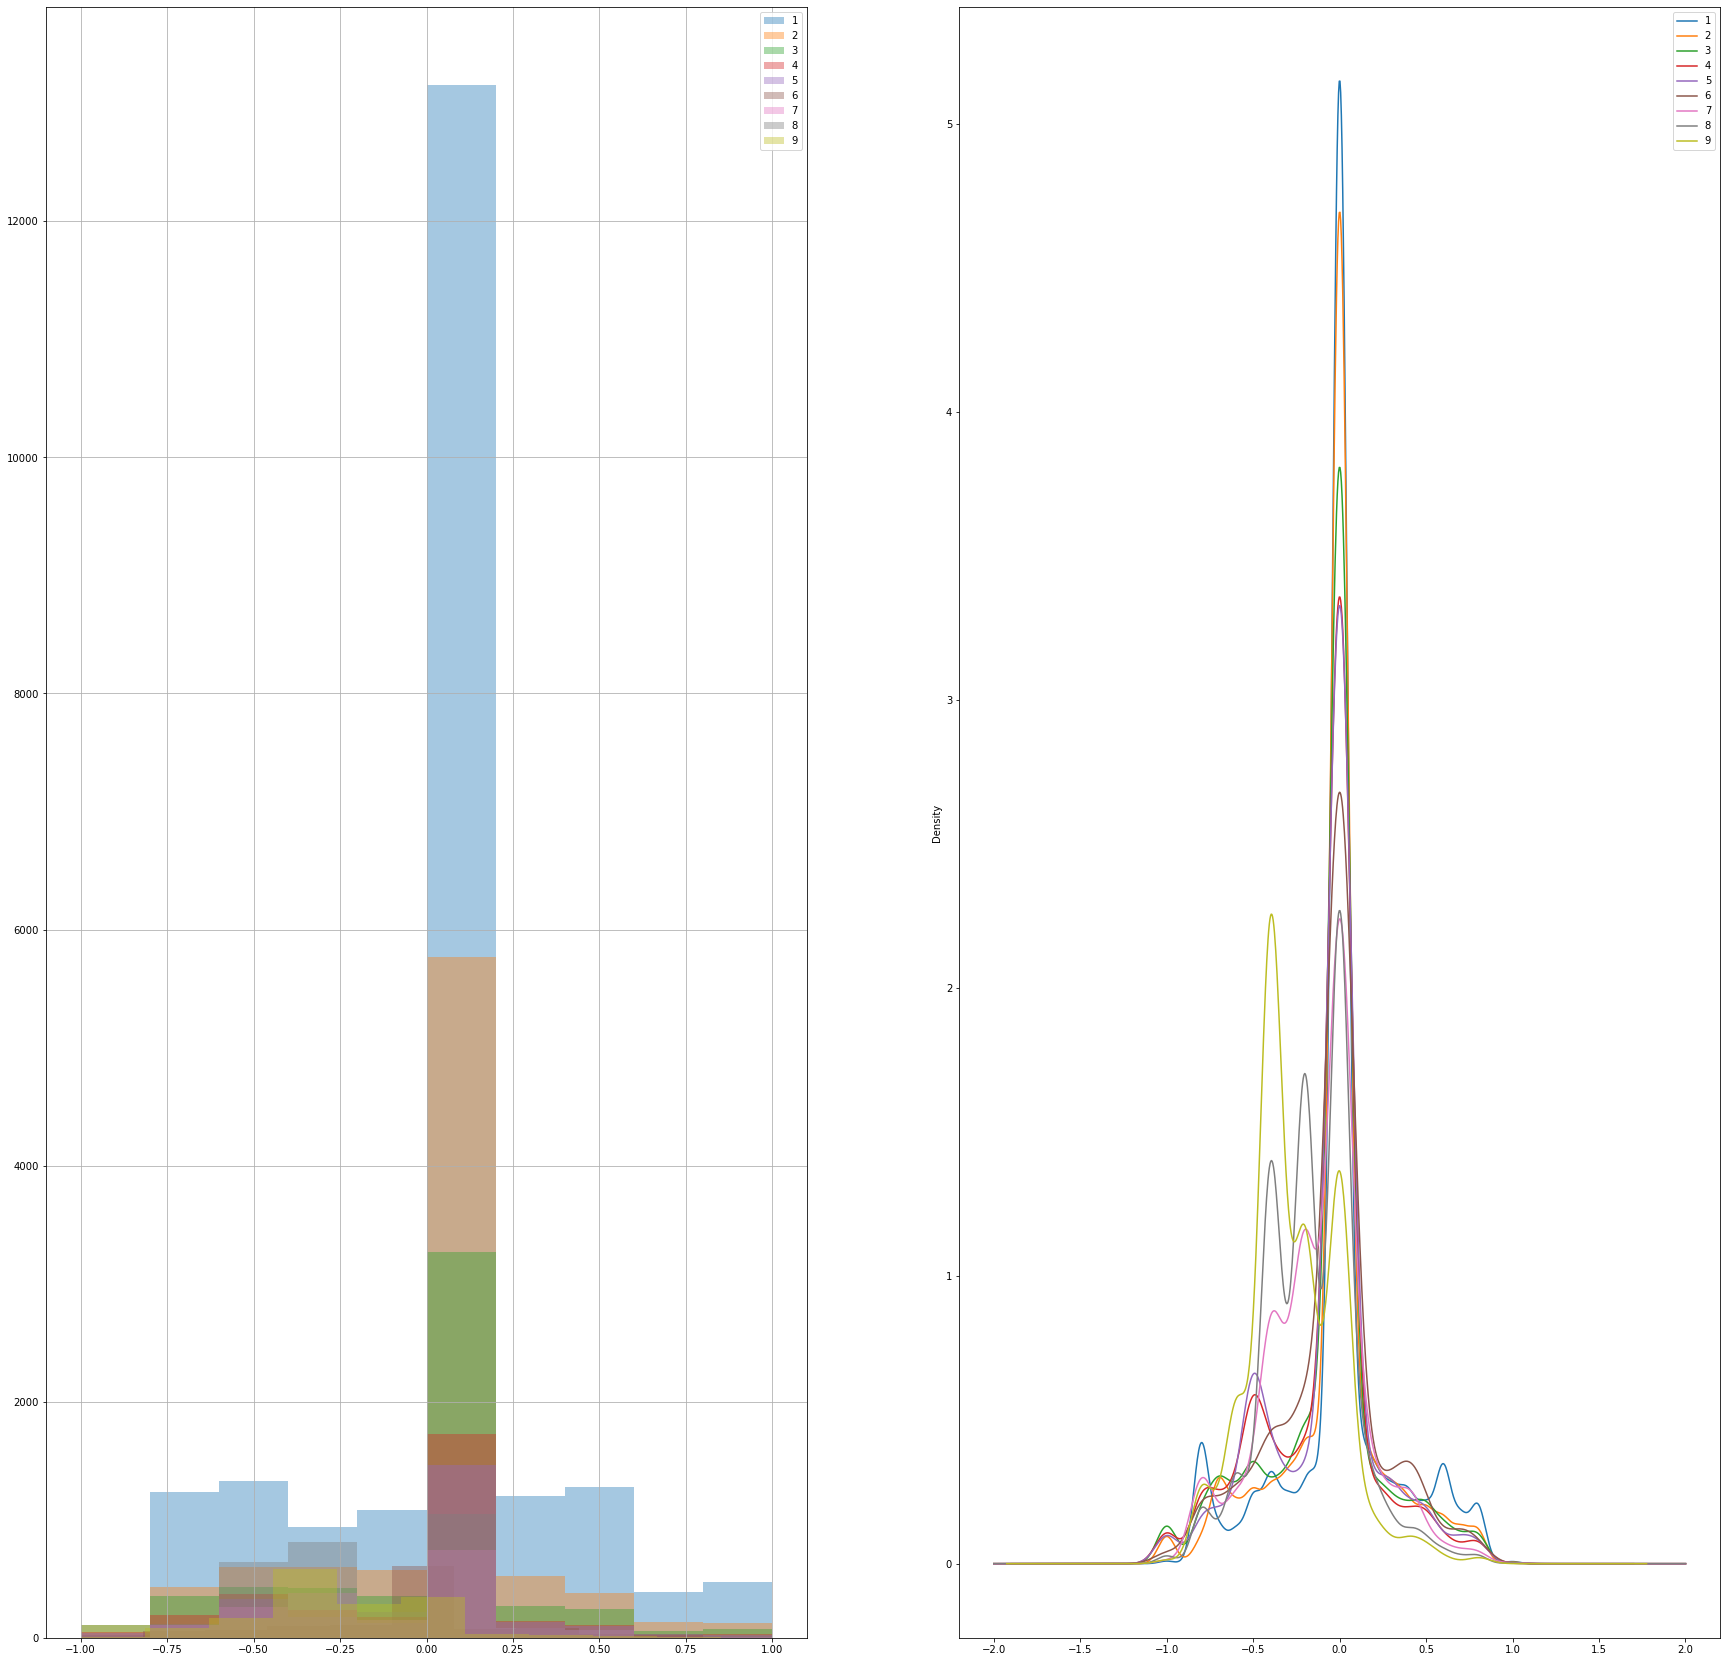

In [44]:
# Polarity for all toxic buckets
fig, axs = plt.subplots(ncols=2)
bucketed_df.groupby("bucket").Polarity.plot(kind='kde', ax=axs[1], figsize=(30,30), legend=True)
bucketed_df.groupby("bucket").Polarity.hist(alpha=0.4, ax=axs[0], figsize=(30,30), legend=True)

bucket
1    AxesSubplot(0.125,0.125;0.352273x0.755)
2    AxesSubplot(0.125,0.125;0.352273x0.755)
3    AxesSubplot(0.125,0.125;0.352273x0.755)
4    AxesSubplot(0.125,0.125;0.352273x0.755)
5    AxesSubplot(0.125,0.125;0.352273x0.755)
6    AxesSubplot(0.125,0.125;0.352273x0.755)
7    AxesSubplot(0.125,0.125;0.352273x0.755)
8    AxesSubplot(0.125,0.125;0.352273x0.755)
9    AxesSubplot(0.125,0.125;0.352273x0.755)
Name: Subjectivity, dtype: object

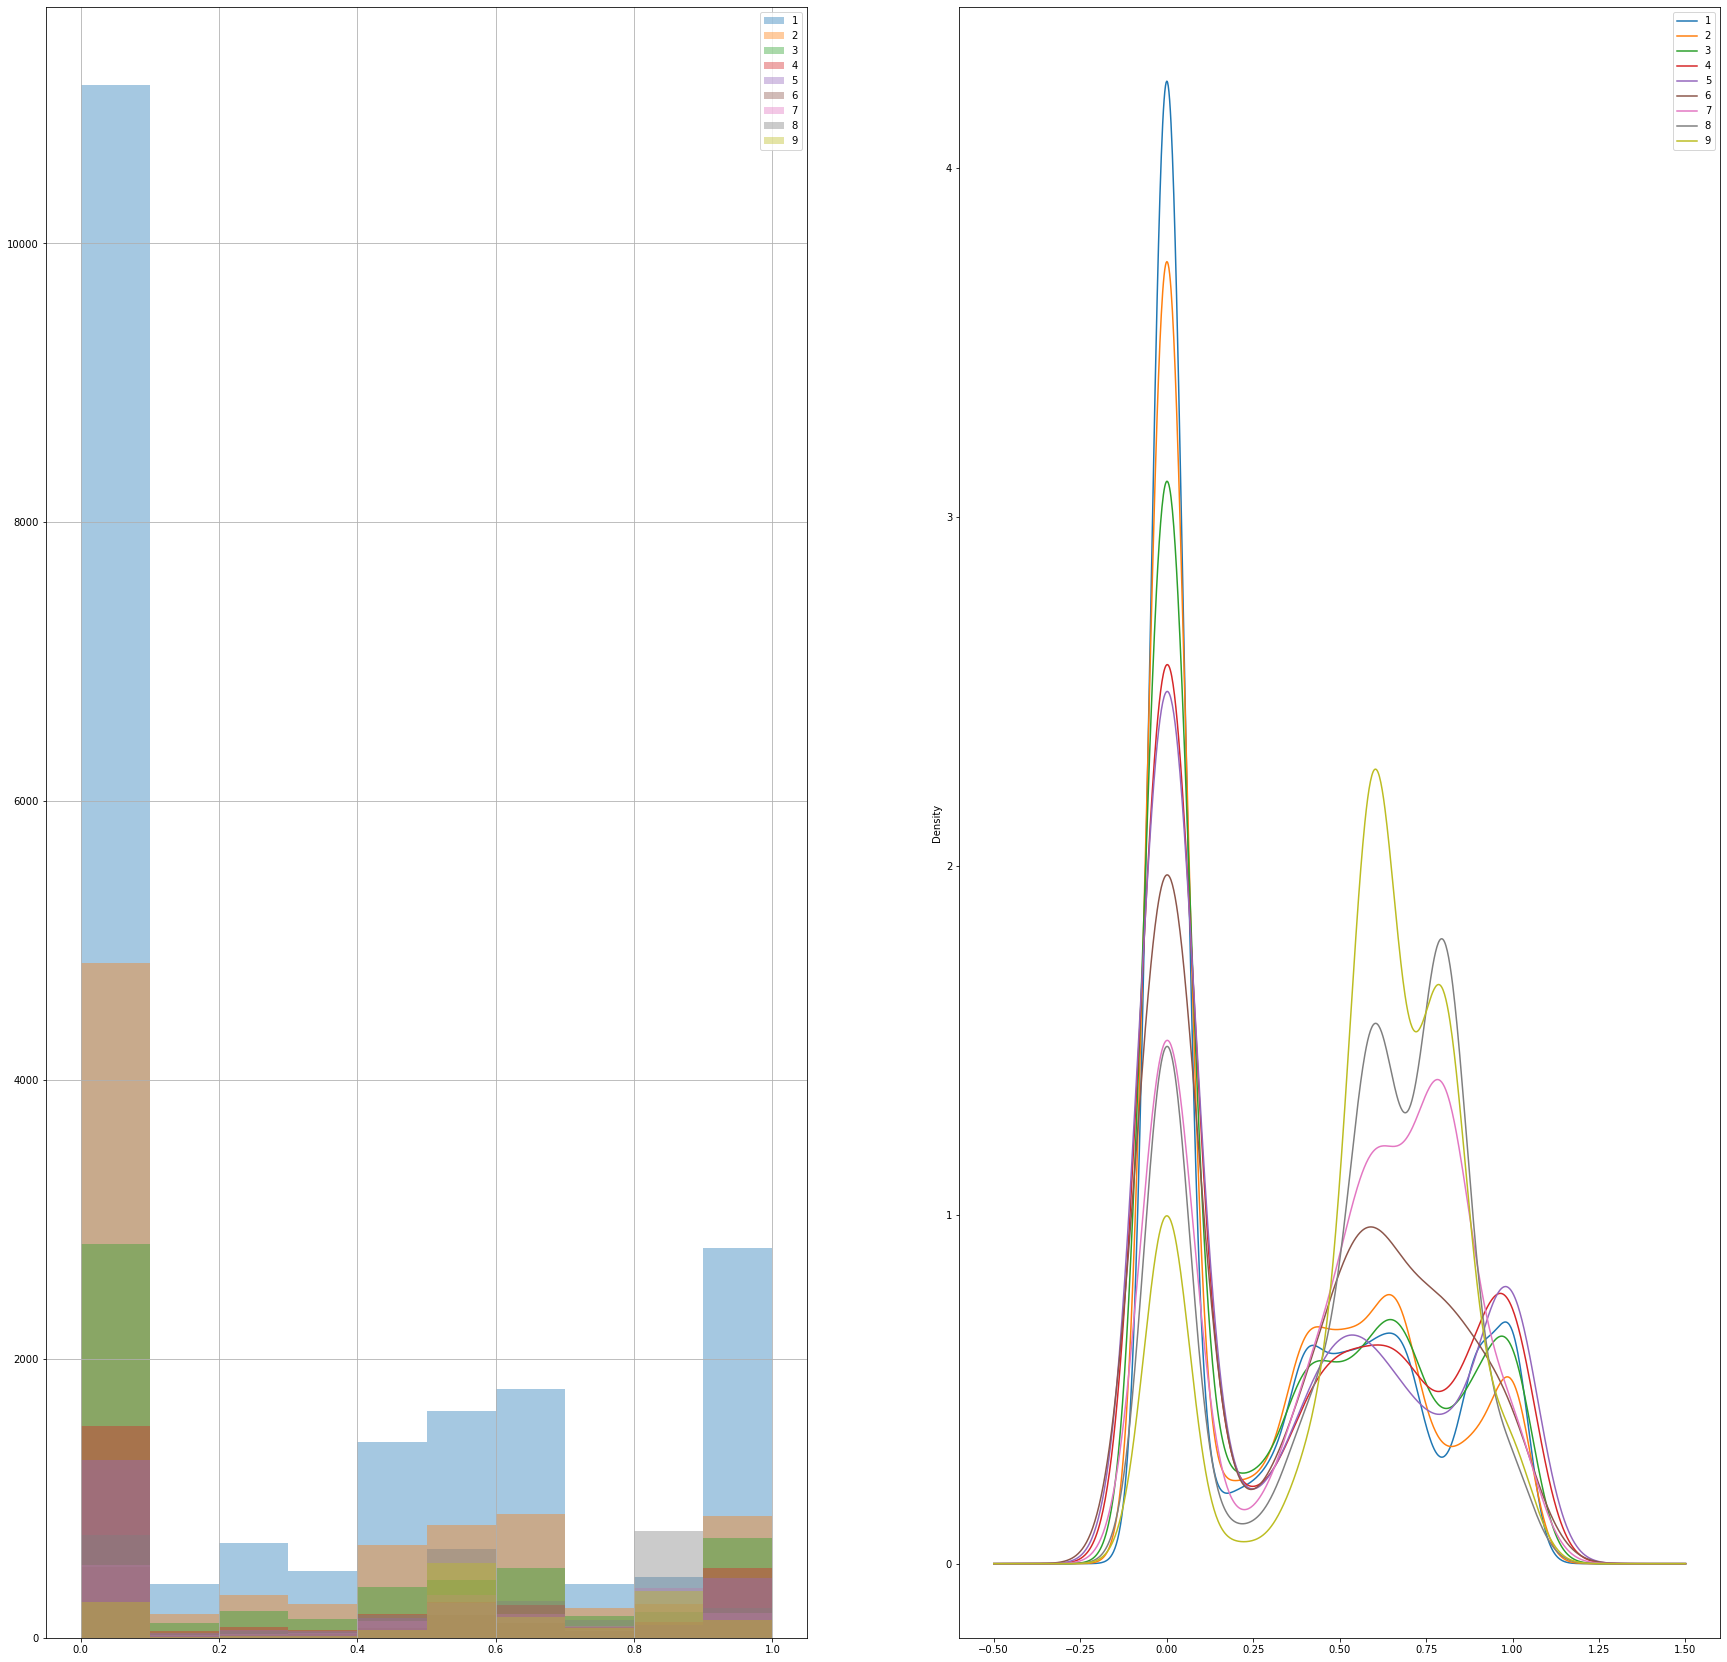

In [45]:
# Subjectivity for all toxic buckets
fig, axs = plt.subplots(ncols=2)
bucketed_df.groupby("bucket").Subjectivity.plot(kind='kde', ax=axs[1], figsize=(30,30), legend=True)
bucketed_df.groupby("bucket").Subjectivity.hist(alpha=0.4, ax=axs[0], figsize=(30,30), legend=True)

<AxesSubplot:>

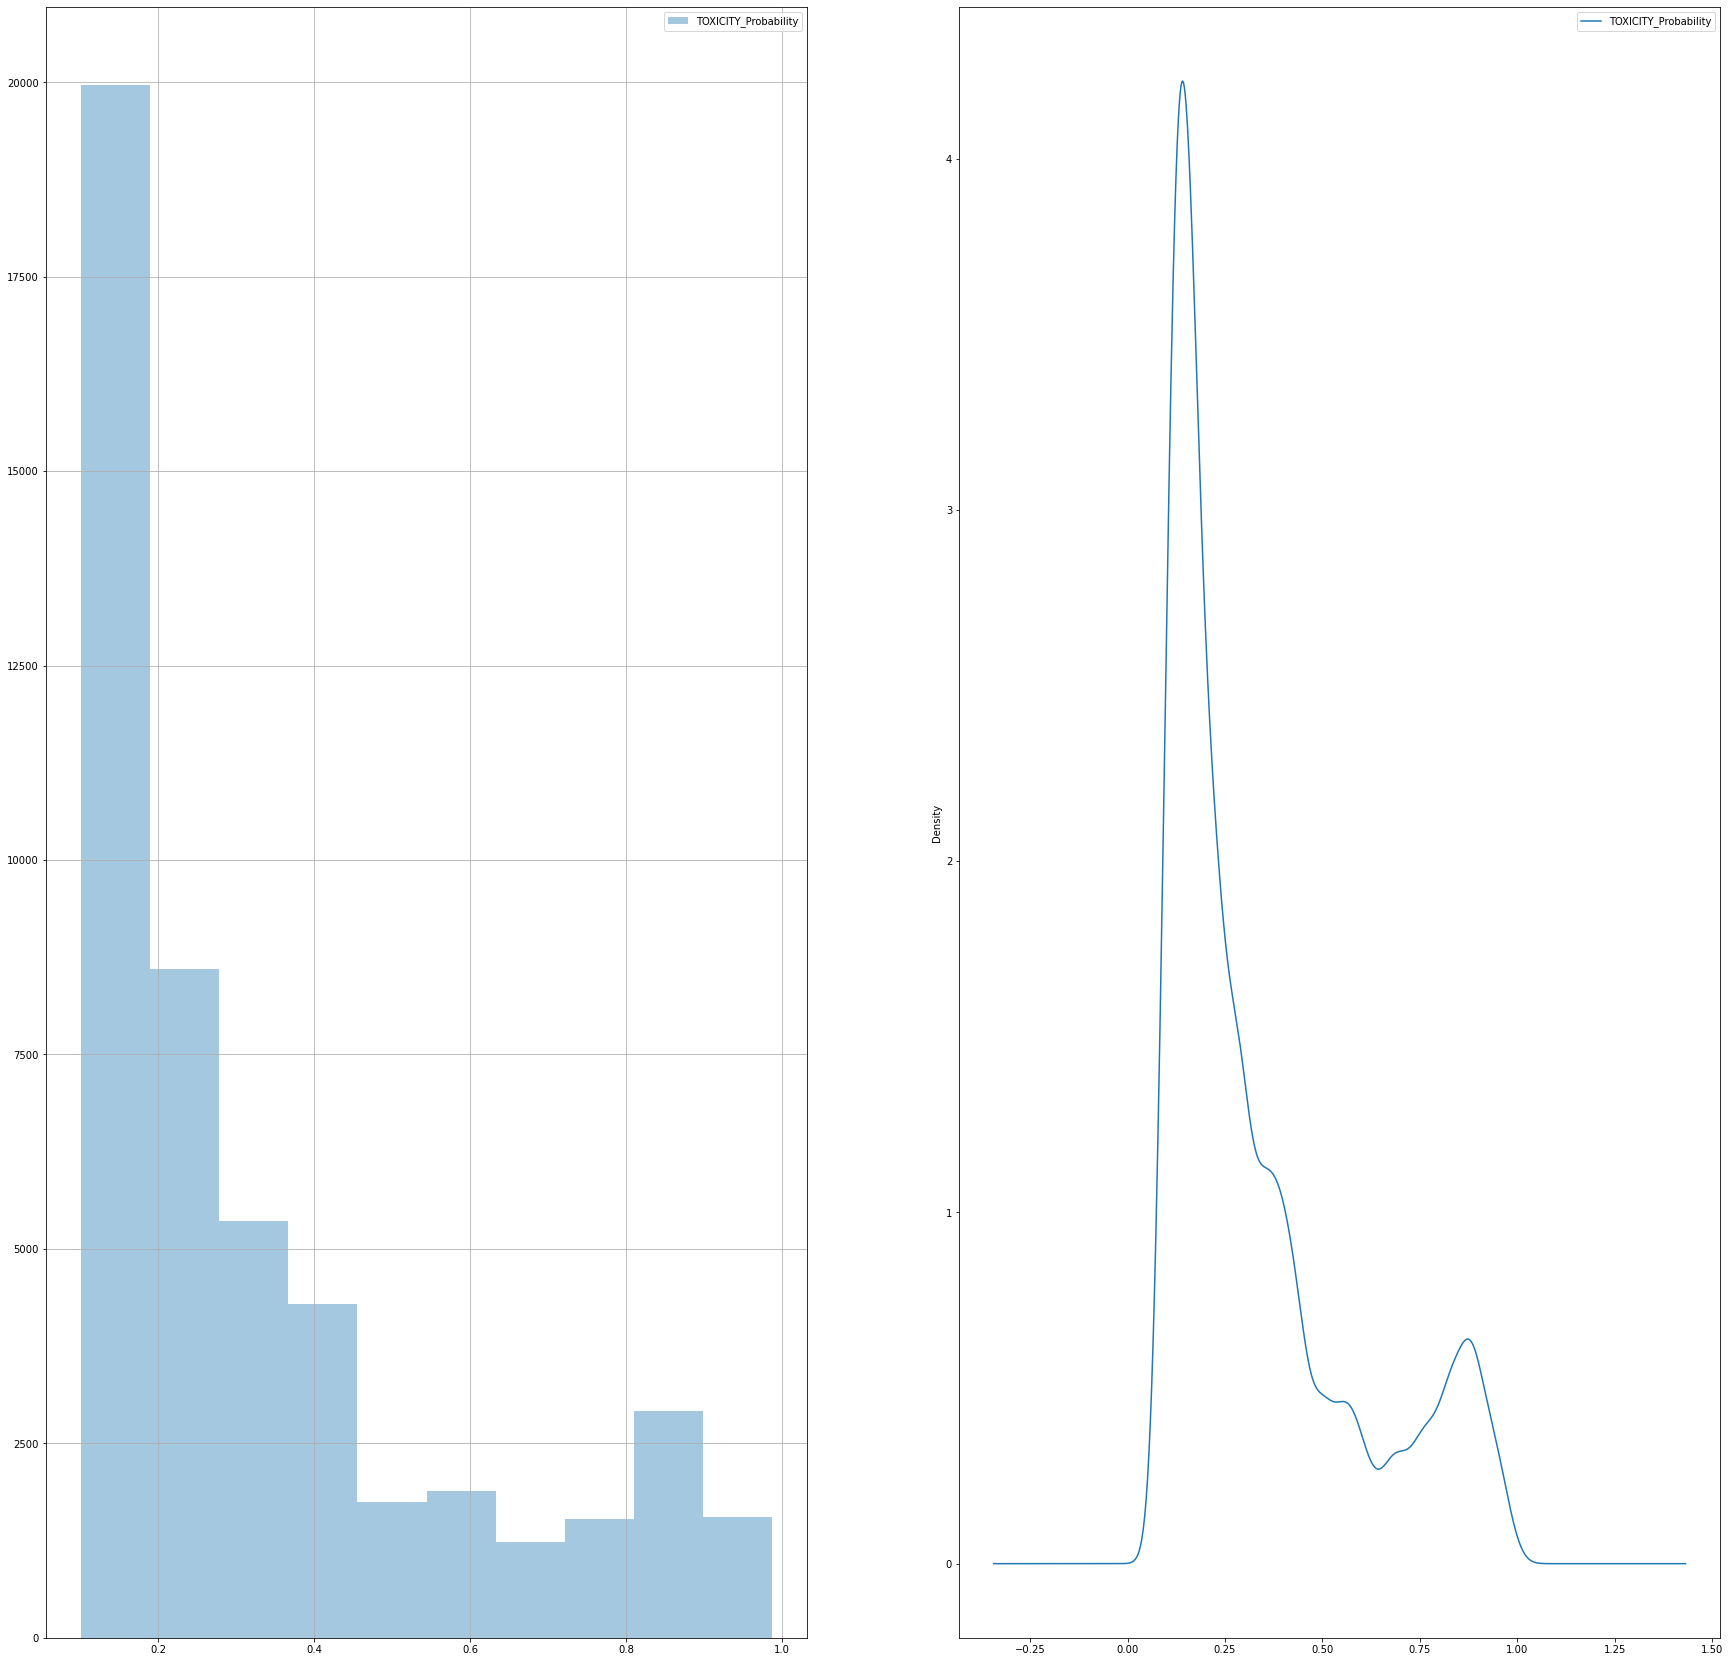

In [46]:
# But what about general toxic distributions across all data?

fig, axs = plt.subplots(ncols=2)
bucketed_df.TOXICITY_Probability.plot(kind='kde', ax=axs[1], figsize=(30,30), legend=True)
bucketed_df.TOXICITY_Probability.hist(alpha=0.4, ax=axs[0], figsize=(30,30), legend=True)

*Was removing stop-words a bad idea before doing sentiment analyis?*

### Moving on to looking atn the other cols


In [47]:
def collumn_ratios(collumn):
    print(f"Total number of { collumn } comments: ",df[f'{ collumn }'].count()," / ",len(df), " = ", float(df[f'{ collumn }'].count()/len(df)))
    print(f"Tox_0_1_df number of { collumn } comments: ",Tox_0_1_df[f'{ collumn }'].count()," / ",len(Tox_0_1_df), " = ", float(Tox_0_1_df[f'{ collumn }'].count()/len(Tox_0_1_df)))
    print(f"Tox_1_2_df number of { collumn } comments: ",Tox_1_2_df[f'{ collumn }'].count()," / ",len(Tox_1_2_df), " = ", float(Tox_1_2_df[f'{ collumn }'].count()/len(Tox_1_2_df)))
    print(f"Tox_2_3_df number of { collumn } comments: ",Tox_2_3_df[f'{ collumn }'].count()," / ",len(Tox_2_3_df), " = ", float(Tox_2_3_df[f'{ collumn }'].count()/len(Tox_2_3_df)))
    print(f"Tox_3_4_df number of { collumn } comments: ",Tox_3_4_df[f'{ collumn }'].count()," / ",len(Tox_3_4_df), " = ", float(Tox_3_4_df[f'{ collumn }'].count()/len(Tox_3_4_df)))
    print(f"Tox_4_5_df number of { collumn } comments: ",Tox_4_5_df[f'{ collumn }'].count()," / ",len(Tox_4_5_df), " = ", float(Tox_4_5_df[f'{ collumn }'].count()/len(Tox_4_5_df)))
    print(f"Tox_5_6_df number of { collumn } comments: ",Tox_5_6_df[f'{ collumn }'].count()," / ",len(Tox_5_6_df), " = ", float(Tox_5_6_df[f'{ collumn }'].count()/len(Tox_5_6_df)))
    print(f"Tox_6_7_df number of { collumn } comments: ",Tox_6_7_df[f'{ collumn }'].count()," / ",len(Tox_6_7_df), " = ", float(Tox_6_7_df[f'{ collumn }'].count()/len(Tox_6_7_df)))
    print(f"Tox_7_8_df number of { collumn } comments: ",Tox_7_8_df[f'{ collumn }'].count()," / ",len(Tox_7_8_df), " = ", float(Tox_7_8_df[f'{ collumn }'].count()/len(Tox_7_8_df)))
    print(f"Tox_8_9_df number of { collumn } comments: ",Tox_8_9_df[f'{ collumn }'].count()," / ",len(Tox_8_9_df), " = ", float(Tox_8_9_df[f'{ collumn }'].count()/len(Tox_8_9_df)))
    print(f"Tox_9_10_df number of { collumn } comments: ",Tox_9_10_df[f'{ collumn }'].count()," / ",len(Tox_9_10_df), " = ", float(Tox_9_10_df[f'{ collumn }'].count()/len(Tox_9_10_df)))

In [48]:
# Too Sparse!
collumn_ratios("Attachment")

Total number of Attachment comments:  63  /  121473  =  0.0005186337704675113
Tox_0_1_df number of Attachment comments:  43  /  72373  =  0.0005941442250563055
Tox_1_2_df number of Attachment comments:  5  /  21114  =  0.00023680969972530075
Tox_2_3_df number of Attachment comments:  8  /  9249  =  0.0008649583738782571
Tox_3_4_df number of Attachment comments:  3  /  5585  =  0.0005371530886302597
Tox_4_5_df number of Attachment comments:  1  /  3057  =  0.00032711808963035657
Tox_5_6_df number of Attachment comments:  0  /  2519  =  0.0
Tox_6_7_df number of Attachment comments:  0  /  1179  =  0.0
Tox_7_8_df number of Attachment comments:  1  /  1823  =  0.0005485463521667581
Tox_8_9_df number of Attachment comments:  1  /  3020  =  0.00033112582781456954
Tox_9_10_df number of Attachment comments:  1  /  1554  =  0.0006435006435006435


In [49]:
# No obvious trends, other than ticking down a little near the end
collumn_ratios("Reply_chain")

Total number of Reply_chain comments:  43655  /  121473  =  0.3593802738057017
Tox_0_1_df number of Reply_chain comments:  26136  /  72373  =  0.36112915037375815
Tox_1_2_df number of Reply_chain comments:  7244  /  21114  =  0.3430898929620157
Tox_2_3_df number of Reply_chain comments:  3428  /  9249  =  0.3706346632068332
Tox_3_4_df number of Reply_chain comments:  2102  /  5585  =  0.3763652641002686
Tox_4_5_df number of Reply_chain comments:  1174  /  3057  =  0.3840366372260386
Tox_5_6_df number of Reply_chain comments:  937  /  2519  =  0.3719730051607781
Tox_6_7_df number of Reply_chain comments:  436  /  1179  =  0.36980491942324
Tox_7_8_df number of Reply_chain comments:  634  /  1823  =  0.3477783872737246
Tox_8_9_df number of Reply_chain comments:  1015  /  3020  =  0.3360927152317881
Tox_9_10_df number of Reply_chain comments:  549  /  1554  =  0.3532818532818533


In [50]:
# Maybe Useful?  Trends down towards overly polite comments.  Perhaps as they are less engaging.
collumn_ratios("Reactions")

Total number of Reactions comments:  3316  /  121473  =  0.027298247347147104
Tox_0_1_df number of Reactions comments:  1619  /  72373  =  0.022370220938747874
Tox_1_2_df number of Reactions comments:  618  /  21114  =  0.029269678886047173
Tox_2_3_df number of Reactions comments:  313  /  9249  =  0.03384149637798681
Tox_3_4_df number of Reactions comments:  237  /  5585  =  0.04243509400179051
Tox_4_5_df number of Reactions comments:  118  /  3057  =  0.038599934576382076
Tox_5_6_df number of Reactions comments:  127  /  2519  =  0.050416832076220726
Tox_6_7_df number of Reactions comments:  48  /  1179  =  0.04071246819338423
Tox_7_8_df number of Reactions comments:  55  /  1823  =  0.030170049369171694
Tox_8_9_df number of Reactions comments:  113  /  3020  =  0.03741721854304636
Tox_9_10_df number of Reactions comments:  68  /  1554  =  0.043758043758043756


In [51]:
# Too Sparse!
collumn_ratios("gif")

Total number of gif comments:  159  /  121473  =  0.0013089328492751477
Tox_0_1_df number of gif comments:  68  /  72373  =  0.0009395769140425297
Tox_1_2_df number of gif comments:  51  /  21114  =  0.0024154589371980675
Tox_2_3_df number of gif comments:  20  /  9249  =  0.0021623959346956426
Tox_3_4_df number of gif comments:  14  /  5585  =  0.002506714413607878
Tox_4_5_df number of gif comments:  4  /  3057  =  0.0013084723585214263
Tox_5_6_df number of gif comments:  1  /  2519  =  0.0003969829297340214
Tox_6_7_df number of gif comments:  1  /  1179  =  0.0008481764206955047
Tox_7_8_df number of gif comments:  0  /  1823  =  0.0
Tox_8_9_df number of gif comments:  0  /  3020  =  0.0
Tox_9_10_df number of gif comments:  0  /  1554  =  0.0


In [52]:
# ERR?
collumn_ratios("Edited_Time")

Total number of Edited_Time comments:  0  /  121473  =  0.0
Tox_0_1_df number of Edited_Time comments:  0  /  72373  =  0.0
Tox_1_2_df number of Edited_Time comments:  0  /  21114  =  0.0
Tox_2_3_df number of Edited_Time comments:  0  /  9249  =  0.0
Tox_3_4_df number of Edited_Time comments:  0  /  5585  =  0.0
Tox_4_5_df number of Edited_Time comments:  0  /  3057  =  0.0
Tox_5_6_df number of Edited_Time comments:  0  /  2519  =  0.0
Tox_6_7_df number of Edited_Time comments:  0  /  1179  =  0.0
Tox_7_8_df number of Edited_Time comments:  0  /  1823  =  0.0
Tox_8_9_df number of Edited_Time comments:  0  /  3020  =  0.0
Tox_9_10_df number of Edited_Time comments:  0  /  1554  =  0.0


We have data now we need to look at it and understand how it works.  After that, I need to build a classifier to pick up on specific toxic comment chains and begin reforming them into a translated non-toxic variant.  We should not do this to every comment, maybe not even the plain rude ones, only the true toxic ones.

NMF into re-classifying an appended sentence of the topic labels, and using that to cluster the comment classes into a binary evaluation?

Take evaluations (average score, distribution of scores, topic and sentiment) of the comments immediately around high toxicity comments that also are at-least kinda toxic in sequence.  Also the length of at least somewhat toxic comments in terms of message chain length.

In [53]:
#Vader sentiment analysis
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3525293430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_0_1_df['Vader'] = Tox_0_1_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

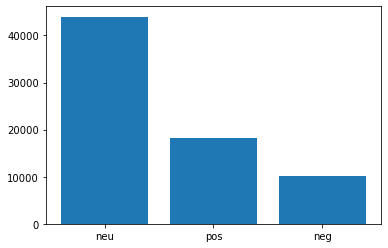

In [54]:
Tox_0_1_df['Vader'] = Tox_0_1_df['Text'].apply(get_vader_score)
ax = Tox_0_1_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\500214761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_1_2_df['Vader'] = Tox_1_2_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

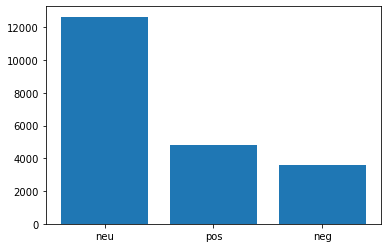

In [55]:
Tox_1_2_df['Vader'] = Tox_1_2_df['Text'].apply(get_vader_score)
ax = Tox_1_2_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3882226683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_2_3_df['Vader'] = Tox_2_3_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

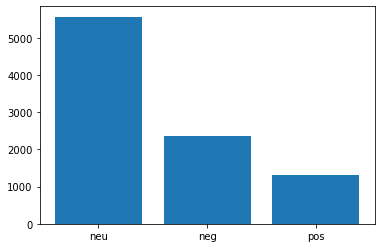

In [56]:
Tox_2_3_df['Vader'] = Tox_2_3_df['Text'].apply(get_vader_score)
ax = Tox_2_3_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3434338415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_3_4_df['Vader'] = Tox_3_4_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

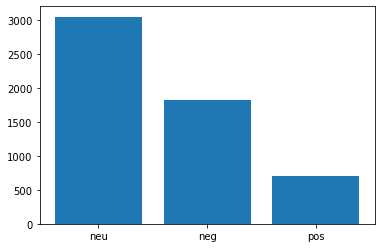

In [57]:
Tox_3_4_df['Vader'] = Tox_3_4_df['Text'].apply(get_vader_score)
ax = Tox_3_4_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\1297455800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_4_5_df['Vader'] = Tox_4_5_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

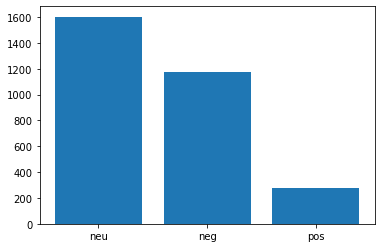

In [58]:
Tox_4_5_df['Vader'] = Tox_4_5_df['Text'].apply(get_vader_score)
ax = Tox_4_5_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\315228970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_5_6_df['Vader'] = Tox_5_6_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

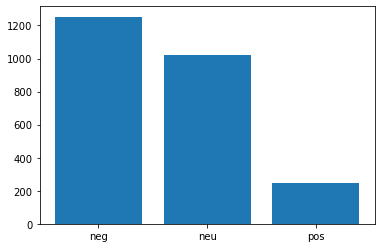

In [59]:
Tox_5_6_df['Vader'] = Tox_5_6_df['Text'].apply(get_vader_score)
ax = Tox_5_6_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\3996730210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_6_7_df['Vader'] = Tox_6_7_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

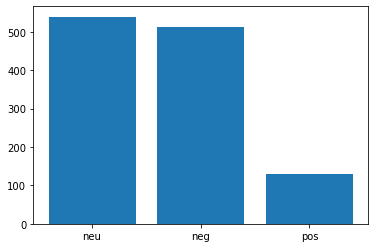

In [60]:
Tox_6_7_df['Vader'] = Tox_6_7_df['Text'].apply(get_vader_score)
ax = Tox_6_7_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\624134843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_7_8_df['Vader'] = Tox_7_8_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

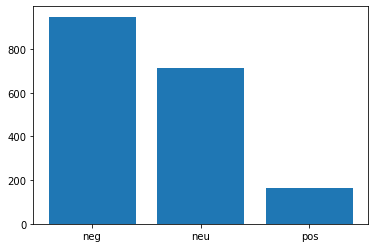

In [61]:
Tox_7_8_df['Vader'] = Tox_7_8_df['Text'].apply(get_vader_score)
ax = Tox_7_8_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2947067996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_8_9_df['Vader'] = Tox_8_9_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

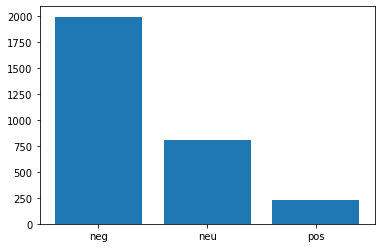

In [62]:
Tox_8_9_df['Vader'] = Tox_8_9_df['Text'].apply(get_vader_score)
ax = Tox_8_9_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

C:\Users\micha\AppData\Local\Temp\ipykernel_16004\2924992399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_9_10_df['Vader'] = Tox_9_10_df['Text'].apply(get_vader_score)


<BarContainer object of 3 artists>

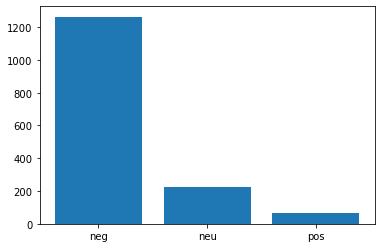

In [63]:
Tox_9_10_df['Vader'] = Tox_9_10_df['Text'].apply(get_vader_score)
ax = Tox_9_10_df['Vader'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(ax.value_counts().index,
        ax.value_counts())

In [64]:
bucketed_df = pd.concat([Tox_0_1_df,Tox_1_2_df,Tox_2_3_df,Tox_3_4_df,Tox_4_5_df,Tox_5_6_df,Tox_6_7_df,Tox_7_8_df,Tox_8_9_df,Tox_9_10_df])
bucketed_df.head()

Time  User_Id               Text Attachment          Reply_chain  \
0  1661962692851     1108              supra        NaN                  NaN   
1  1661962696380      622                 hb        NaN                  NaN   
3  1661962700953        3          nice like        NaN  1014569710844653588   
4  1661962713995        8  friday work today        NaN  1014569740078956666   
5  1661962716146      358   school great fun        NaN                  NaN   

              Reactions  gif  Edited_Time  TOXICITY_Probability  Polarity  \
0  [{'c': 1, 'n': '🤓'}]  NaN          NaN              0.043375      0.00   
1                   NaN  NaN          NaN              0.029984      0.00   
3                   NaN  NaN          NaN              0.075312      0.60   
4                   NaN  NaN          NaN              0.017007      0.00   
5                   NaN  NaN          NaN              0.022213      0.55   

   Subjectivity  bucket  Vader  
0         0.000       0      1  
1         0.000       0      1  
3         1.000       0      2  
4         0.000       0      1  
5         0.475       0      2

-- Does not seem worth it to extrapolate on these other columns further.

In [65]:
#NMF Topic Modeling
#https://predictivehacks.com/topic-modelling-with-nmf-in-python/
# use tfidf by removing tokens that don't appear in at least 50 documents
Tox_0_10_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_0_1_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_1_2_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_2_3_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_3_4_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_4_5_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_5_6_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_6_7_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_7_8_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_8_9_vect = TfidfVectorizer(min_df=50, stop_words='english')
Tox_9_10_vect = TfidfVectorizer(min_df=50, stop_words='english')

In [66]:
# Fit and transform
Tox_0_10_df_X = Tox_0_10_vect.fit_transform(bucketed_df.Text)
Tox_0_1_df_X = Tox_0_1_vect.fit_transform(Tox_0_1_df.Text)
Tox_1_2_df_X = Tox_1_2_vect.fit_transform(Tox_1_2_df.Text)
Tox_2_3_df_X = Tox_2_3_vect.fit_transform(Tox_2_3_df.Text)
Tox_3_4_df_X = Tox_3_4_vect.fit_transform(Tox_3_4_df.Text)
Tox_4_5_df_X = Tox_4_5_vect.fit_transform(Tox_4_5_df.Text)
Tox_5_6_df_X = Tox_5_6_vect.fit_transform(Tox_5_6_df.Text)
Tox_6_7_df_X = Tox_6_7_vect.fit_transform(Tox_6_7_df.Text)
Tox_7_8_df_X = Tox_7_8_vect.fit_transform(Tox_7_8_df.Text)
Tox_8_9_df_X = Tox_8_9_vect.fit_transform(Tox_8_9_df.Text)
Tox_9_10_df_X = Tox_9_10_vect.fit_transform(Tox_9_10_df.Text)

In [67]:
Tox_0_10_df_X = Tox_0_10_vect.fit_transform(bucketed_df.Text)
Tox_0_1_df_X = Tox_0_1_vect.fit_transform(Tox_0_1_df.Text)
Tox_1_2_df_X = Tox_1_2_vect.fit_transform(Tox_1_2_df.Text)
Tox_2_3_df_X = Tox_2_3_vect.fit_transform(Tox_2_3_df.Text)
Tox_3_4_df_X = Tox_3_4_vect.fit_transform(Tox_3_4_df.Text)
Tox_4_5_df_X = Tox_4_5_vect.fit_transform(Tox_4_5_df.Text)
Tox_5_6_df_X = Tox_5_6_vect.fit_transform(Tox_5_6_df.Text)
Tox_6_7_df_X = Tox_6_7_vect.fit_transform(Tox_6_7_df.Text)
Tox_7_8_df_X = Tox_7_8_vect.fit_transform(Tox_7_8_df.Text)
Tox_8_9_df_X = Tox_8_9_vect.fit_transform(Tox_8_9_df.Text)
Tox_9_10_df_X = Tox_9_10_vect.fit_transform(Tox_9_10_df.Text)

In [68]:
# Create an NMF instance: model
# the 10 components will be the topics
Tox_0_10_model = NMF(n_components=10, random_state=5)
Tox_0_1_model = NMF(n_components=10, random_state=5)
Tox_1_2_model = NMF(n_components=10, random_state=5)
Tox_2_3_model = NMF(n_components=10, random_state=5)
Tox_3_4_model = NMF(n_components=10, random_state=5)
Tox_4_5_model = NMF(n_components=10, random_state=5)
Tox_5_6_model = NMF(n_components=10, random_state=5)
Tox_6_7_model = NMF(n_components=10, random_state=5)
Tox_7_8_model = NMF(n_components=10, random_state=5)
Tox_8_9_model = NMF(n_components=10, random_state=5)
Tox_9_10_model = NMF(n_components=10, random_state=5)

In [69]:
# Fit the model to TF-IDF
Tox_0_10_model.fit(Tox_0_10_df_X)
Tox_0_1_model.fit(Tox_0_1_df_X)
Tox_1_2_model.fit(Tox_1_2_df_X)
Tox_2_3_model.fit(Tox_2_3_df_X)
Tox_3_4_model.fit(Tox_3_4_df_X)
Tox_4_5_model.fit(Tox_4_5_df_X)
Tox_5_6_model.fit(Tox_5_6_df_X)
Tox_6_7_model.fit(Tox_6_7_df_X)
Tox_7_8_model.fit(Tox_7_8_df_X)
Tox_8_9_model.fit(Tox_8_9_df_X)
Tox_9_10_model.fit(Tox_9_10_df_X)

c:\Users\micha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\micha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\micha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\micha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings

NMF(n_components=10, random_state=5)

In [70]:
# Transform the TF-IDF: nmf_features
Tox_0_10_nmf = Tox_0_10_model.transform(Tox_0_10_df_X)
Tox_0_1_nmf = Tox_0_1_model.transform(Tox_0_1_df_X)
Tox_1_2_nmf = Tox_1_2_model.transform(Tox_1_2_df_X)
Tox_2_3_nmf = Tox_2_3_model.transform(Tox_2_3_df_X)
Tox_3_4_nmf = Tox_3_4_model.transform(Tox_3_4_df_X)
Tox_4_5_nmf = Tox_4_5_model.transform(Tox_4_5_df_X)
Tox_5_6_nmf = Tox_5_6_model.transform(Tox_5_6_df_X)
Tox_6_7_nmf = Tox_6_7_model.transform(Tox_6_7_df_X)
Tox_7_8_nmf = Tox_7_8_model.transform(Tox_7_8_df_X)
Tox_8_9_nmf = Tox_8_9_model.transform(Tox_8_9_df_X)
Tox_9_10_nmf = Tox_9_10_model.transform(Tox_9_10_df_X)

c:\Users\micha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [71]:
# Create a DataFrame: components_df
Tox_0_10_components_df = pd.DataFrame(Tox_0_10_model.components_, columns=Tox_0_10_vect.get_feature_names())
Tox_0_1_components_df = pd.DataFrame(Tox_0_1_model.components_, columns=Tox_0_1_vect.get_feature_names())
Tox_1_2_components_df = pd.DataFrame(Tox_1_2_model.components_, columns=Tox_1_2_vect.get_feature_names())
Tox_2_3_components_df = pd.DataFrame(Tox_2_3_model.components_, columns=Tox_2_3_vect.get_feature_names())
Tox_3_4_components_df = pd.DataFrame(Tox_3_4_model.components_, columns=Tox_3_4_vect.get_feature_names())
Tox_4_5_components_df = pd.DataFrame(Tox_4_5_model.components_, columns=Tox_4_5_vect.get_feature_names())
Tox_5_6_components_df = pd.DataFrame(Tox_5_6_model.components_, columns=Tox_5_6_vect.get_feature_names())
Tox_6_7_components_df = pd.DataFrame(Tox_6_7_model.components_, columns=Tox_6_7_vect.get_feature_names())
Tox_7_8_components_df = pd.DataFrame(Tox_7_8_model.components_, columns=Tox_7_8_vect.get_feature_names())
Tox_8_9_components_df = pd.DataFrame(Tox_8_9_model.components_, columns=Tox_8_9_vect.get_feature_names())
Tox_9_10_components_df = pd.DataFrame(Tox_9_10_model.components_, columns=Tox_9_10_vect.get_feature_names())

c:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_fe

In [72]:
# The above dataframes contain the topics per-toxicitybucket
for topic in range(Tox_0_10_components_df.shape[0]):
    tmp = Tox_0_10_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
rank       5.076368
promote    5.046723
level      0.002817
gang       0.002364
lot        0.001822
channel    0.001714
kim        0.001427
add        0.001410
glad       0.001298
high       0.001207
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
like      7.533654
look      0.417031
feel      0.376592
people    0.217981
shit      0.214047
sound     0.209845
don       0.184961
think     0.169299
man       0.167896
cod       0.149768
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
good        5.539521
cod         0.233274
pretty      0.145134
think       0.121912
morning     0.107840
time        0.105237
campaign    0.097307
thing       0.089660
man         0.086087
mw2         0.084685
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
play       4.748176
beta       0.960855
cod        0.584419
mw2        0.363981
want       0.282120
pc         0.243086
wa

In [73]:
for topic in range(Tox_0_1_components_df.shape[0]):
    tmp = Tox_0_1_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
rank       4.581586
promote    4.526941
level      0.003975
beta       0.002028
glad       0.001784
ve         0.001609
day        0.001526
night      0.001509
general    0.001379
hear       0.001302
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
good        8.061970
cod         0.347622
pretty      0.187492
morning     0.170854
campaign    0.135268
man         0.119533
time        0.116779
think       0.103089
tho         0.098810
luck        0.097290
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
yes        5.600573
ah         0.032004
oh         0.022936
bro        0.016310
time       0.014898
think      0.012878
need       0.011161
warzone    0.010546
way        0.009734
issue      0.009702
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
play        5.181946
cod         0.519845
beta        0.234223
warzone     0.188471
pc          0.186661
mw2    

In [74]:
for topic in range(Tox_1_2_components_df.shape[0]):
    tmp = Tox_1_2_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
rank       3.883296
promote    3.877131
send       0.005478
discord    0.002858
oh         0.001989
easy       0.001945
match      0.001879
cod        0.001716
bc         0.001534
server     0.001484
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
lmao     4.805917
yeah     0.076566
think    0.041904
know     0.034823
mean     0.032816
beta     0.032730
idk      0.030325
say      0.024786
oh       0.021364
fr       0.020956
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
like      4.738764
look      0.305794
feel      0.243950
don       0.194530
people    0.129901
stuff     0.093127
know      0.091922
man       0.090634
time      0.089185
cod       0.087378
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
play      4.679231
cod       0.590201
want      0.586484
war       0.556771
cold      0.433762
wanna     0.394007
beta      0.355725
people    0.304606


In [75]:
for topic in range(Tox_2_3_components_df.shape[0]):
    tmp = Tox_2_3_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
like     4.476951
feel     0.295212
look     0.248998
man      0.092054
talk     0.079789
lmfao    0.077966
guy      0.068604
black    0.056664
thing    0.054747
gun      0.053872
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
bad        3.650748
feel       0.066275
map        0.063711
beta       0.062392
warzone    0.061237
yeah       0.060551
mw2        0.057226
thing      0.050187
tbh        0.049344
break      0.048829
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
game     4.096332
dead     0.258727
kill     0.255579
crash    0.189969
hate     0.128638
new      0.114319
buy      0.101950
use      0.097812
black    0.091538
year     0.086830
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
bro      3.372291
talk     0.100379
say      0.096028
nah      0.090396
want     0.090202
man      0.084662
stop     0.073284
hit      0.061794
watch    0.056052


In [76]:
for topic in range(Tox_3_4_components_df.shape[0]):
    tmp = Tox_3_4_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
like    3.904867
look    0.225303
feel    0.174451
don     0.113726
girl    0.096129
guy     0.085153
play    0.083157
say     0.082048
ur      0.072709
lmao    0.063397
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
bad      3.580408
cod      0.194241
look     0.118452
guy      0.091720
thing    0.051542
think    0.048216
lol      0.046297
want     0.034630
year     0.033674
mw2      0.033433
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
kill     3.604362
time     0.099167
play     0.082697
mean     0.051015
think    0.048475
talk     0.048133
nah      0.045222
good     0.043171
cod      0.042358
know     0.040630
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
hate     3.202405
good     0.155784
thing    0.065107
lol      0.056745
use      0.056517
war      0.048238
mw2      0.045731
need     0.043969
try      0.042165
love     0.036946
Name: 3, dty

In [77]:
for topic in range(Tox_4_5_components_df.shape[0]):
    tmp = Tox_4_5_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
wtf     3.752332
say     0.053176
guy     0.049675
lol     0.044648
good    0.026338
want    0.011981
man     0.009217
cod     0.007726
bad     0.000000
bro     0.000000
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
like     3.453414
die      0.109063
time     0.080810
ur       0.068892
guy      0.066589
shoot    0.052303
man      0.049138
cod      0.048075
want     0.030681
say      0.020344
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
stfu    3.503178
guy     0.019916
man     0.018703
say     0.015000
ur      0.008855
bro     0.000063
bad     0.000000
cod     0.000000
die     0.000000
game    0.000000
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
kill     3.101662
guy      0.191435
time     0.108912
good     0.088316
die      0.070944
lol      0.055055
say      0.050742
shoot    0.046973
man      0.031410
want     0.017834
Name: 3, dtype: float6

In [78]:
for topic in range(Tox_5_6_components_df.shape[0]):
    tmp = Tox_5_6_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
damn      4.561189
good      0.043404
know      0.021592
play      0.008777
bro       0.000000
cod       0.000000
game      0.000000
kill      0.000000
like      0.000000
people    0.000000
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
wtf       3.666007
know      0.009823
play      0.007638
people    0.000008
bro       0.000000
cod       0.000000
damn      0.000000
game      0.000000
good      0.000000
kill      0.000000
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
like      3.296244
know      0.230098
ur        0.058062
good      0.012162
bro       0.000000
cod       0.000000
damn      0.000000
game      0.000000
kill      0.000000
people    0.000000
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
trash    3.579551
good     0.193010
play     0.028720
bro      0.000000
cod      0.000000
damn     0.000000
game     0.000000
kill     0.000000
know    

In [79]:
for topic in range(Tox_6_7_components_df.shape[0]):
    tmp = Tox_6_7_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
like    1.928782e-01
damn    1.116876e-07
shit    4.110599e-08
game    0.000000e+00
suck    0.000000e+00
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
damn    1.715512e-01
game    2.577165e-10
like    0.000000e+00
shit    0.000000e+00
suck    0.000000e+00
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
suck    0.229988
damn    0.000000
game    0.000000
like    0.000000
shit    0.000000
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
shit    6.610971e-01
game    2.248230e-07
damn    0.000000e+00
like    0.000000e+00
suck    0.000000e+00
Name: 3, dtype: float64


For topic 5 the words with the highest value are:
game    2.422940
suck    0.061678
damn    0.000000
like    0.000000
shit    0.000000
Name: 4, dtype: float64


For topic 6 the words with the highest value are:
damn    0.144352
game    0.000000
like    0.000000
shit    0.000000
suck    0.000000


In [80]:
for topic in range(Tox_7_8_components_df.shape[0]):
    tmp = Tox_7_8_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
shit       4.362326
bro        0.078812
people     0.056451
play       0.029649
ass        0.000000
damn       0.000000
dogshit    0.000000
fuck       0.000000
fucking    0.000000
game       0.000000
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
fuck       3.748849
people     0.069774
bro        0.060958
play       0.027859
ass        0.000000
damn       0.000000
dogshit    0.000000
fucking    0.000000
game       0.000000
like       0.000000
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
suck       3.456097
people     0.030294
bro        0.020670
game       0.002630
ass        0.000000
damn       0.000000
dogshit    0.000000
fuck       0.000000
fucking    0.000000
like       0.000000
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
ass        3.348206
bro        0.205656
people     0.019610
game       0.003488
play       0.002340
damn       0.000000
do

In [81]:
for topic in range(Tox_8_9_components_df.shape[0]):
    tmp = Tox_8_9_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
shit    5.048401
holy    0.119970
talk    0.065649
play    0.055884
lmao    0.052453
know    0.037100
say     0.035876
cod     0.035393
want    0.035101
yeah    0.034450
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
fuck    4.627340
yeah    0.065495
want    0.048217
beta    0.038061
man     0.033926
lmao    0.033711
know    0.031147
say     0.029488
cod     0.028020
talk    0.025521
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
ass     4.351343
man     0.148215
want    0.065649
know    0.037670
say     0.026624
yeah    0.023298
lmao    0.021352
cod     0.019694
play    0.016674
beta    0.015213
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
fucking    3.672961
lmao       0.129215
beta       0.073503
yeah       0.061360
know       0.054637
man        0.043575
play       0.022639
say        0.021297
talk       0.015443
cod        0.007177
Name: 3, dty

In [82]:
for topic in range(Tox_9_10_components_df.shape[0]):
    tmp = Tox_9_10_components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
fuck       4.699904
dumb       0.035202
ass        0.000000
bitch      0.000000
fucking    0.000000
game       0.000000
like       0.000000
shit       0.000000
shut       0.000000
stupid     0.000000
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
shit       4.134600
dumb       0.032907
ass        0.000000
bitch      0.000000
fuck       0.000000
fucking    0.000000
game       0.000000
like       0.000000
shut       0.000000
stupid     0.000000
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
ass        3.604438
dumb       0.030006
bitch      0.000000
fuck       0.000000
fucking    0.000000
game       0.000000
like       0.000000
shit       0.000000
shut       0.000000
stupid     0.000000
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
fucking    3.366570
dumb       0.074459
ass        0.000000
bitch      0.000000
fuck       0.000000
game       0.000000
li

I think we can use these to determine a cut-off point of toxic buckets, as well as maybe aiding in classification

In [83]:
# Sentiment over time
bucketed_df = bucketed_df.sort_values(by=['Time'])
bucketed_df.head()

Time  User_Id               Text Attachment          Reply_chain  \
0  1661962692851     1108              supra        NaN                  NaN   
1  1661962696380      622                 hb        NaN                  NaN   
2  1661962696556      113       ana de armas        NaN  1014569529956909139   
3  1661962700953        3          nice like        NaN  1014569710844653588   
4  1661962713995        8  friday work today        NaN  1014569740078956666   

              Reactions  gif  Edited_Time  TOXICITY_Probability  Polarity  \
0  [{'c': 1, 'n': '🤓'}]  NaN          NaN              0.043375       0.0   
1                   NaN  NaN          NaN              0.029984       0.0   
2                   NaN  NaN          NaN              0.108281       0.0   
3                   NaN  NaN          NaN              0.075312       0.6   
4                   NaN  NaN          NaN              0.017007       0.0   

   Subjectivity  bucket  Vader  
0           0.0       0      1  
1           0.0       0      1  
2           0.0       1      1  
3           1.0       0      2  
4           0.0       0      1

In [84]:
# Huge gap in time data making plot DPI very high, find index of gap
last = bucketed_df['Time'][0]
for i, e in bucketed_df.iterrows():
    if e['Time'] - last > 50000000:
        print(i)
    last = e['Time']

35325


In [85]:
# End of block 1
print(bucketed_df['Time'][35324])
# Start of block 2
print(bucketed_df['Time'][35325])

1662511682275
1663923906388


In [86]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# The plots from below were too large to upload to github, they are stored in a seperate folder: TimeSeries_Tocix_Metrics

In [ ]:
# TOXICITY_Probability BLOCK_1
plt.figure(figsize=(500, 100))
plt.plot(bucketed_df['Time'][:35325],bucketed_df['TOXICITY_Probability'][:35325])
plt.xlabel('Time')
plt.ylabel('TOXICITY_Probability')
plt.show()

In [ ]:
# TOXICITY_Probability BLOCK_2
plt.figure(figsize=(500, 100))
plt.plot(bucketed_df['Time'][35325:],bucketed_df['TOXICITY_Probability'][35325:])
plt.xlabel('Time')
plt.ylabel('TOXICITY_Probability')
plt.show()

In [ ]:
# Polarity BLOCK_1
plt.figure(figsize=(500, 100))
plt.plot(bucketed_df['Time'][:35325],bucketed_df['Polarity'][:35325])
plt.xlabel('Time')
plt.ylabel('Polarity')
plt.show()

In [ ]:
# Polarity BLOCK_2
plt.figure(figsize=(500, 100))
plt.plot(bucketed_df['Time'][35325:],bucketed_df['Polarity'][35325:])
plt.xlabel('Time')
plt.ylabel('Polarity')
plt.show()

In [ ]:
# Subjectivity BLOCK_1
plt.figure(figsize=(500, 100))
plt.plot(bucketed_df['Time'][:35325],bucketed_df['Subjectivity'][:35325])
plt.xlabel('Time')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Subjectivity BLOCK_2
plt.figure(figsize=(500, 100))
plt.plot(bucketed_df['Time'][35325:],bucketed_df['Subjectivity'][35325:])
plt.xlabel('Time')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Vader BLOCK_1
plt.figure(figsize=(500, 100))
plt.plot(bucketed_df['Time'][:35325],bucketed_df['Vader'][:35325])
plt.xlabel('Time')
plt.ylabel('Vader')
plt.show()

In [ ]:
# Vader BLOCK_2
plt.figure(figsize=(500, 100))
plt.plot(bucketed_df['Time'][35325:],bucketed_df['Vader'][35325:])
plt.xlabel('Time')
plt.ylabel('Vader')
plt.show()

## TODO:
- Plot individual users
- Via actual time, by symbilic markers (night, lunch)
- add other visual cues
- social network aspect of toxic chat over time, people are nodes, edges are connection of toxic chat (look for netowrk of toxic communications among people by time), and eval toxic level
- when a group of people are on at some time and conversing, measure toxicity via node-graph network

## After this...

- Build 2-stage classifier for toxicity.  First stage checks to see if comment is at-least kinda toxic, second checks to see if it is a problem that needs a translation job.
- Build a language style transfer generator.  Re-classify, and score.